# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:


1. **Carat**-Carat weight of the cubic zirconia.
2. **Cut**- Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. **Color**- Colour of the cubic zirconia.With D being the worst and J the best.
4. **Clarity**- Clarity refers to the absence of the Inclusions and Blemishes. 
   (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
5. **Depth**- The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. **Table**- The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. **Price**- the Price of the cubic zirconia.
8. **X**- Length of the cubic zirconia in mm.
9. **Y**- Width of the cubic zirconia in mm.
10. **Z**- Height of the cubic zirconia in mm.

The purpose of the report is to examine past information on cubic zirconia in order to assist the company in predicting price slots for the stone based on the information provided in the dataset. Understanding the data and examining the pattern of how pricing influences various variables. Providing business insights based on exploratory data analysis and predictions of price 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### Read and view data

In [2]:
zirconia = pd.read_csv("cubic_zirconia.csv")

In [3]:
zirconia.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
zirconia.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
zirconia.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


### Data Pre-processing

###### Checking for number of rows and columns:

In [6]:
zirconia.shape

(26967, 10)

###### Checking for the information of features:

In [7]:
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


###### Checking for Null and missing values in the dataset :

In [8]:
zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

###### Checking for data types in the dataset :

In [9]:
zirconia.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

###### Checking the Skewness and Kurtosis

In [10]:
zirconia.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [11]:
zirconia.kurt()

carat      1.215364
depth      3.674431
table      1.582166
x         -0.657825
y        159.291616
z         87.006350
price      2.148617
dtype: float64

###### Checking the description of dataset

In [12]:
zirconia.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


###### Checking for duplicates in this dataset :

In [13]:
# Are there any duplicates?
dups = zirconia.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
zirconia[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [14]:
zirconia.duplicated().sum()

34

In [15]:
zirconia.drop_duplicates(inplace=True)

In [16]:
zirconia.shape

(26933, 10)

### Observations:
- Dataset has 11 columns and 26967 rows icluding the 'unnamed:0' column.
- The first column "Unnamed: 0" has only serial numbers, so we can drop it as it is not useful.
- There are both categorical and continuous data. For categorical data, we have cut, colour and clarity For continuous data we have carat, depth, table, x. y, z and price.
- Price will be target variable.
- The dataset is used for predicting the price for the zirconia stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share.
- There are around 697 missing values in the variable 'depth' which will be imputed during the data preprocessing stage.
- There are 34 duplicate values present in the dataset, although there is a probability that 2 or more stones can be of similar dimensions and features but we will drop the duplicates so avoid any overlapping.
- There are total 5 unique types of 'cut' out of which the highest number of cut is 'Ideal' one which accounts to almost 10816 of observations, which is approximately 50% of the dataset.
-  There are total 7 types of 'color' out of which highest number of color is 'G', which is 5661, accounts to almost 25% of the dataset.
- There are total 8 types of 'clarity' in the dataset and the highest number of 'clarity' is 'SI1' which is 6571 which accounts to almost 30% of the dataset.
- Skewness and Kurtosis is also calculated for each column, Data with high skewness indicates lack of symmetry and high value of kurtosis indicates heavily tailed data.
- Based on summary descriptive, the data looks good, We see that for most of the variables the mean/medium are nearly equal.

### Data Visualization :

### Univariate Analysis for Numeric Variables:

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [17]:
df_num = zirconia.select_dtypes(['float64','int64'])
df_cat = zirconia.select_dtypes(['object'])

In [18]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(zirconia[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(zirconia[column], kde= True, bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=zirconia[column])
    
    plt.show()

In [19]:
df_num = zirconia.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


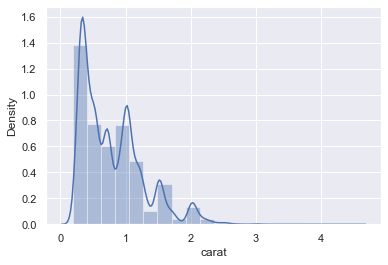

BoxPlot of carat
----------------------------------------------------------------------------


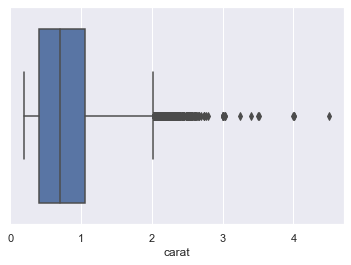

Description of depth
----------------------------------------------------------------------------
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 Distribution of depth
----------------------------------------------------------------------------


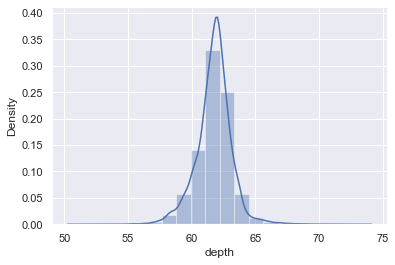

BoxPlot of depth
----------------------------------------------------------------------------


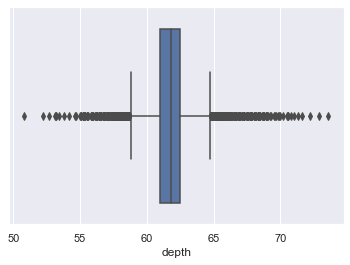

Description of table
----------------------------------------------------------------------------
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 Distribution of table
----------------------------------------------------------------------------


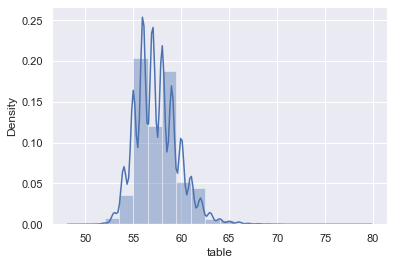

BoxPlot of table
----------------------------------------------------------------------------


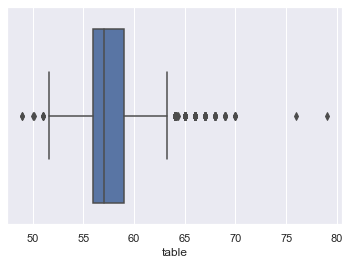

Description of x
----------------------------------------------------------------------------
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 Distribution of x
----------------------------------------------------------------------------


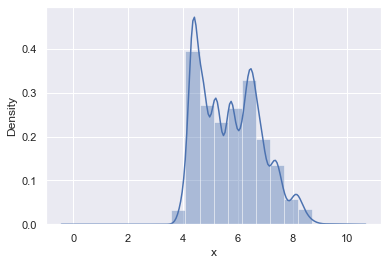

BoxPlot of x
----------------------------------------------------------------------------


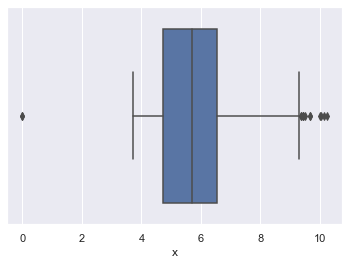

Description of y
----------------------------------------------------------------------------
count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64 Distribution of y
----------------------------------------------------------------------------


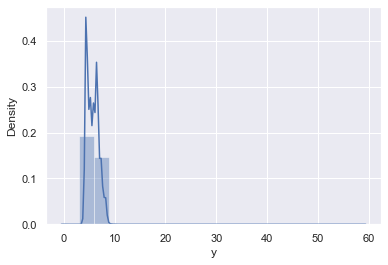

BoxPlot of y
----------------------------------------------------------------------------


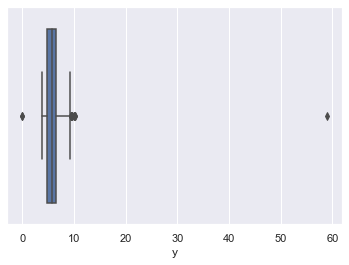

Description of z
----------------------------------------------------------------------------
count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 Distribution of z
----------------------------------------------------------------------------


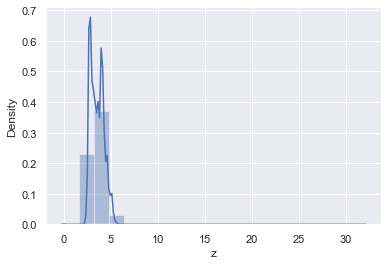

BoxPlot of z
----------------------------------------------------------------------------


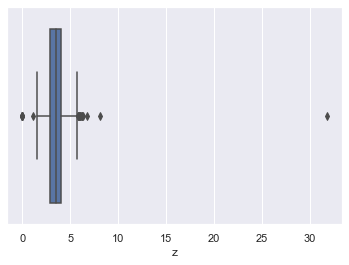

Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


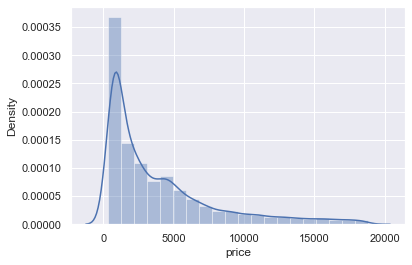

BoxPlot of price
----------------------------------------------------------------------------


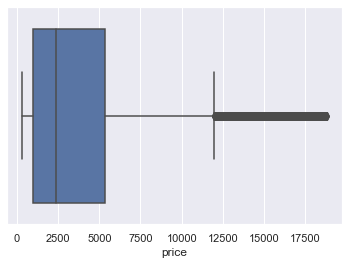

In [20]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Observations:

### 1 - Carat: Carat weight of the cubic zirconia.
- From the above graphs, we can infer that mean 'carat' weight of the cubic zirconia is around 0.79 with the minimum of 0.20 and maximum of 4.50.
- The distribution of 'cart' is right skewed with skewness vlaue of 1.1164.
- The distribution spikes at around 0.4 ,1, 1.5 and 2
- The dist plot shows the distribution of most of data from 0 to 2.5.
- The box plot of the 'cart' variable shows presence of large number of outliers.

### 2 - Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- From the above graphs, we can infer that mean 'depth' height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter is around 61.74 with the minimum of 50.80 and maximum of 73.60.
- The distribution of 'depth' is slightly left skewed with skewness vlaue of -0.0286.
- The distribution follows a near normal distribution with long tails both on the right side and the left side. 
- The dist plot shows the distribution of most of data from 55 to 70.
- The box plot of the 'depth' variable shows presence of large number of outliers.

### 3 - Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- From the above graphs, we can infer that mean width of the cubic zirconia's 'Table' expressed as a Percentage of its Average Diameteris around 57.45 with the minimum of 49.00 and maximum of 79.00.
- The distribution of 'table' is right skewed with skewness vlaue of 0.7657.
- The distribution has multiple spikes at around 53, 55,60 and 62.5.
- The dist plot shows the distribution of most of data from 50 to 65.
- The box plot of the 'table' variable shows presence of outliers.

### 4 - X: Length of the cubic zirconia in mm.
- From the above graphs, we can infer that mean 'X' length of the cubic zirconia in mm is around 5.72.
- The distribution of 'X' is slightly right skewed with skewness vlaue of  0.3879.
- This distribution has various spikes.
- The dist plot shows the distribution of most of data from 3 to 10.
- The box plot of the 'X' variable shows presence of few outliers.

### 5 - Y: Width of the cubic zirconia in mm.
- From the above graphs, we can infer that mean 'Y' Width of the cubic zirconia in mm is around 5.73.
- The distribution of 'Y' is right skewed with skewness vlaue of 3.8501.
- The distribution has an extremely long right-side tail because of presence of one outlier at around 60.
- The dist plot shows the distribution of most of data from 0 to 10.
- The box plot of the 'Y' variable shows presence of few outliers.

### 6 - Z: Height of the cubic zirconia in mm.
- From the above graphs, we can infer that mean 'Z' Height of the cubic zirconia in mm is around 3.53.
- The distribution of 'Z' is right skewed with skewness vlaue of 2.568.
- The distribution has an extremely long right-side tail because of presence of one outlier at around 30.
- The dist plot shows the distribution of most of data from 0 to 5.
- The box plot of the 'Z' variable shows presence of few outliers.

### 7 - Price: the Price of the cubic zirconia
- From the above graphs, we can infer that mean the Price of the cubic zirconia is around 3939.51 with the minimum of 326.00 and maximum of 18818.00.
- The distribution of 'Price' is right skewed with skewness vlaue of 1.6185.
- The distribution has an extremely long right-side tail because of presence of one outlier at around 30.
- The dist plot shows the distribution of most of data from 325 to 15000.
- The box plot of the 'Price' variable shows  presence of large number of outliers.

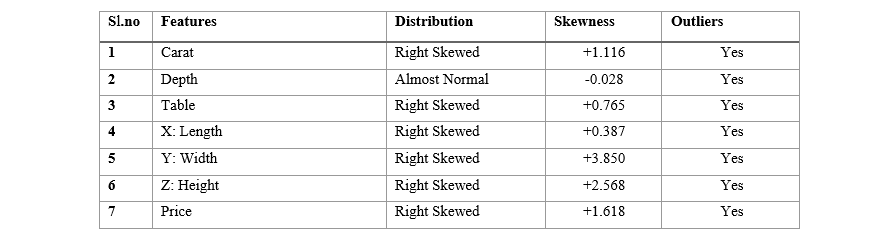


### Univariate Analysis for Cateforical Variables:

In [21]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [22]:
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

3

Details of cut
----------------------------------------------------------------
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


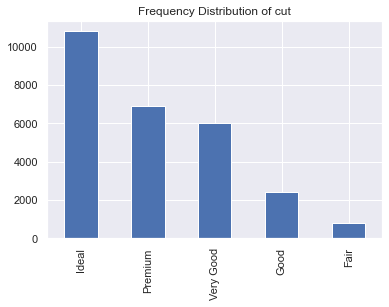

       
Details of color
----------------------------------------------------------------
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


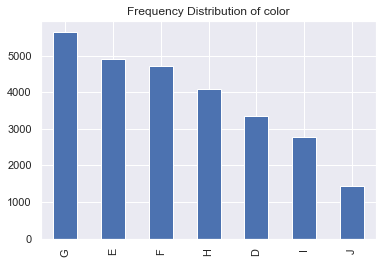

       
Details of clarity
----------------------------------------------------------------
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


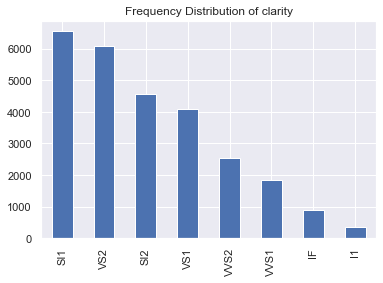

In [23]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Observations:

- The distribution of the 'cut' which describe the cut quality of the cubic zirconia, in which 'Ideal' cut shows maximum frequency of 10816 and the least frequeny cut observed is the ‘Fair’ one.
- The distribution of the 'Colour' of the cubic zirconia, shows 'G' colour with maximum frequency of 5661 and the least frequeny one is J.
- The distribution of the 'clarity' of the cubic zirconia (Clarity refers to the absence of the Inclusions and Blemishes), shows 'SI1' type with maximum frequency of 6571  and the least frequently observed is ‘I1’

### Bivariate Analysis

### Boxplot of Categorical variable with Price

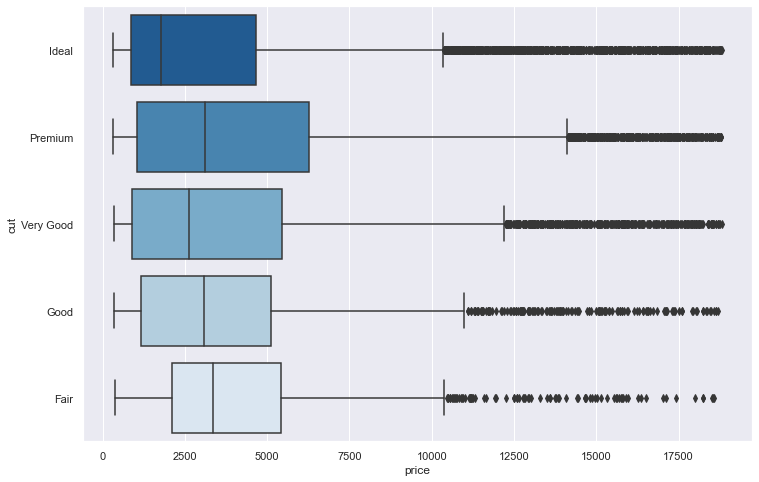

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x= zirconia['price'], y= zirconia['cut'], palette='Blues_r');

- For the cut variable we see the most sold zirconia stone is 'Ideal' cut type gems and least sold is Fair cut gems
- All cut type gems have outliers with respect to price.
- Slightly less priced seems to be Ideal type and premium cut type to be slightly more expensive

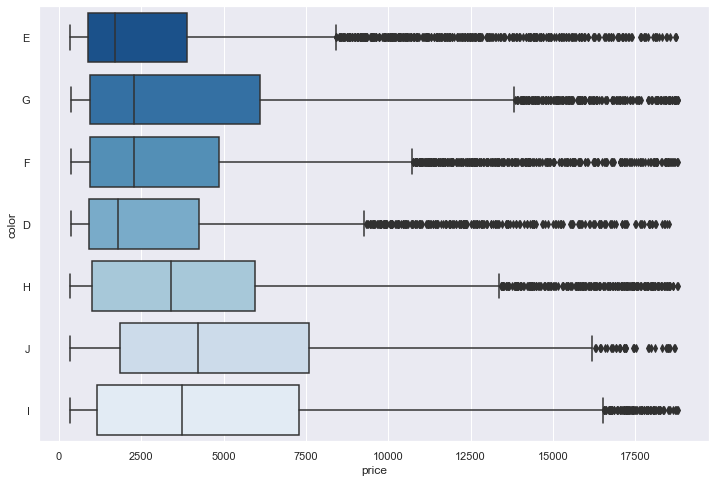

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x= zirconia['price'], y= zirconia['color'],palette='Blues_r');

- For the color variable we see the most sold is G colored gems and least is J colored gems
- All color type gems have outliers with respect to price
- However, the least priced seems to be E type; J and I colored gems seems to be more expensive

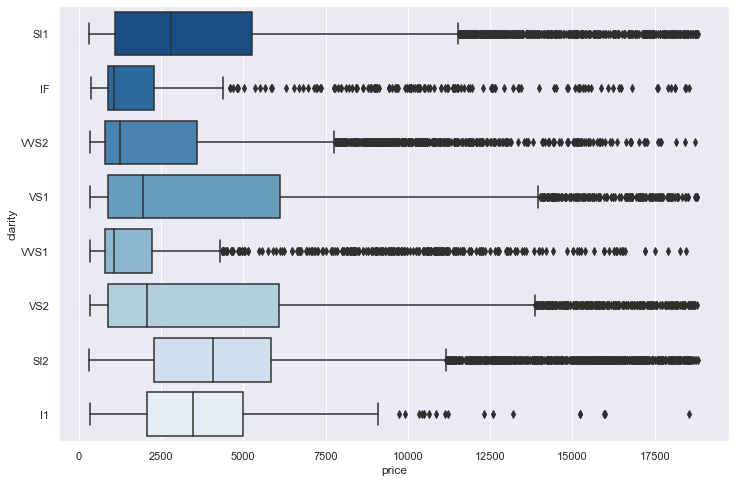

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x= zirconia['price'], y= zirconia['clarity'],palette='Blues_r');

- For the clarity variable we see the most sold is SI1 clarity gems and least is I1 clarity gems
- All clarity type gems have outliers with respect to price
- Slightly less priced seems to be SI1 type; VS2 and SI2 clarity stones seems to be more expensive

**Pairplot**

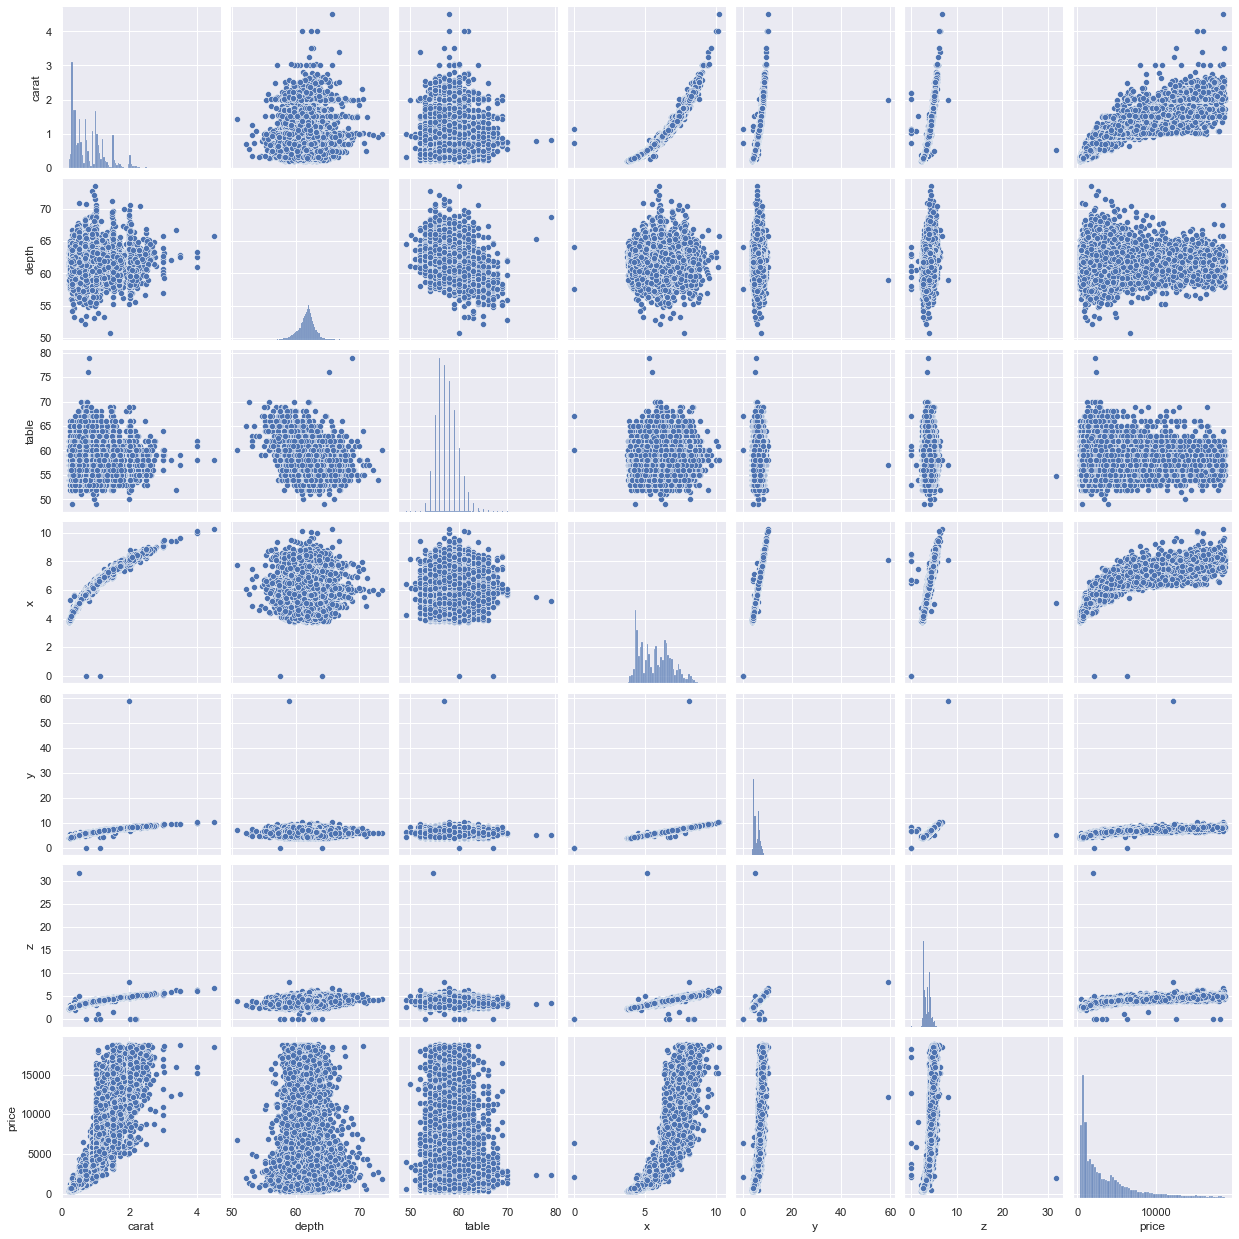

In [27]:
sns.pairplot(zirconia)

### Observations:
- From the above pairplot, we can see that 'Carar' and 'Price' are linearly correlated, which means the attribute carat influences the price of zirconia stone the most.
- We can see that X,Y and Z are having the linear relation with each other and also the target variable 'price'
- According to the assumptions for Linear regression model, the independepent variables should not be linearly corelated with eachother which leads to the high multicollinearity between the independent variables X,Y and Z which is length, width and height respectively.
 

### Scatter plot of numeric variables with price - To check the linear relation between independent variables and dependent variable 'Price

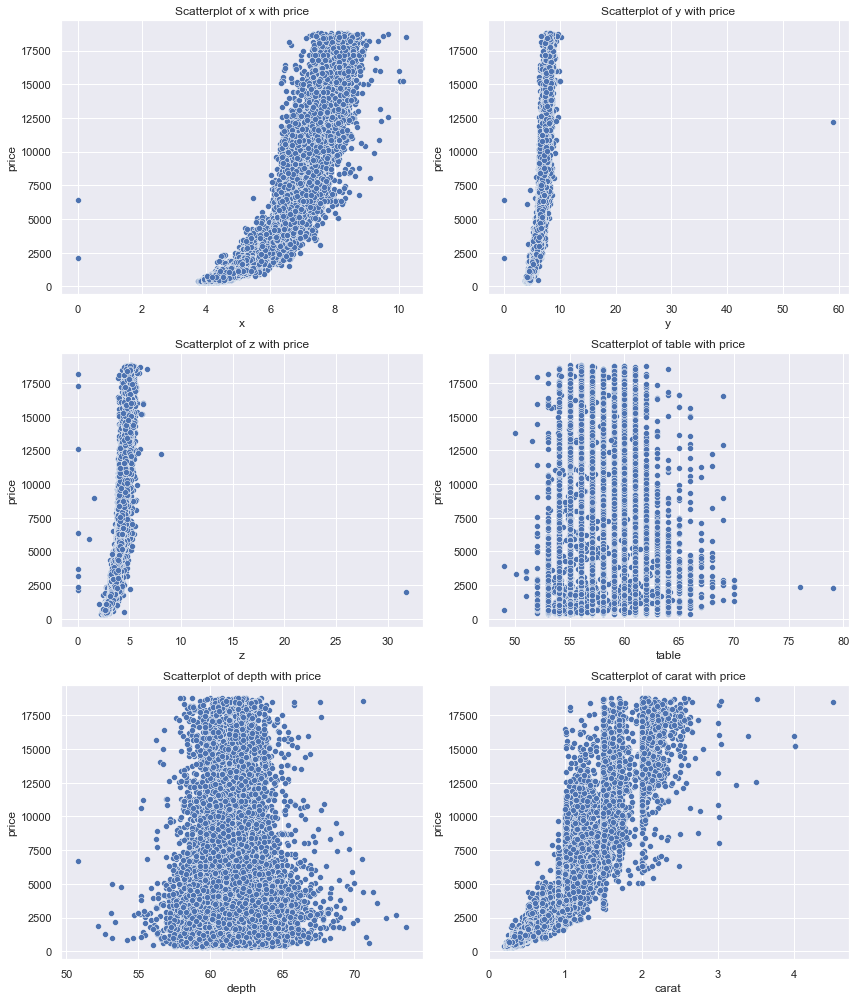

In [28]:
plt.figure(figsize = (12,14))
feature_list = df_num[['x','y','z','table', 'depth', 'carat']].columns
for i in range(len(feature_list)):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x = df_num[feature_list[i]], y = 'price',  data = df_num)
    plt.title('Scatterplot of {} with price'.format(feature_list[i]))
    plt.tight_layout()

### Numeric variables vs Price

<Figure size 864x576 with 0 Axes>

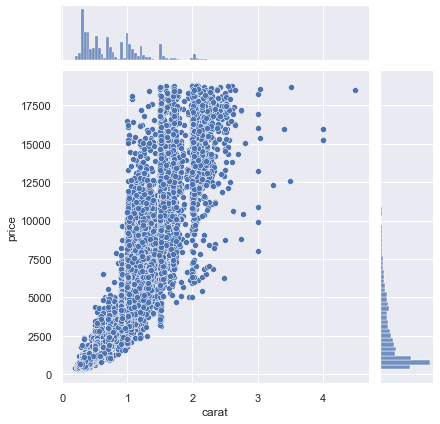

In [29]:
plt.figure(figsize=(12,8))
sns.jointplot(zirconia['carat'], zirconia['price']);
plt.show()

- From the above plot we can see that, the price and carat are having positive linear relationship. with increase in carat of zirconia stone, the price is also increasing.

<Figure size 864x576 with 0 Axes>

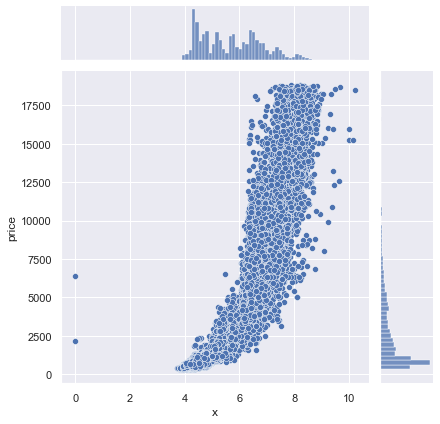

In [30]:
plt.figure(figsize=(12,8))
sns.jointplot(zirconia['x'], zirconia['price']);
plt.show()

<Figure size 864x576 with 0 Axes>

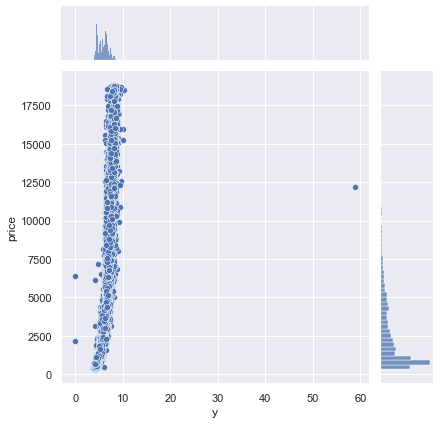

In [31]:
plt.figure(figsize=(12,8))
sns.jointplot(zirconia['y'], zirconia['price']);
plt.show()

<Figure size 864x576 with 0 Axes>

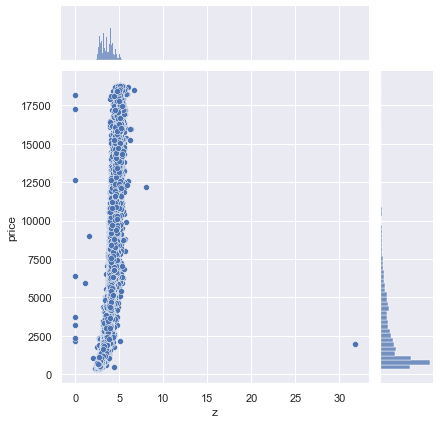

In [32]:
plt.figure(figsize=(12,8))
sns.jointplot(zirconia['z'], zirconia['price']);
plt.show()

<Figure size 864x576 with 0 Axes>

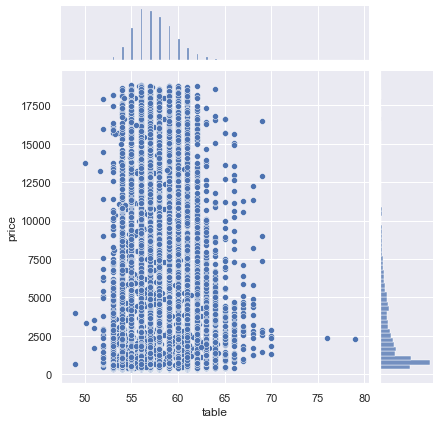

In [33]:
plt.figure(figsize=(12,8))
sns.jointplot(zirconia['table'], zirconia['price']);
plt.show()

<Figure size 864x576 with 0 Axes>

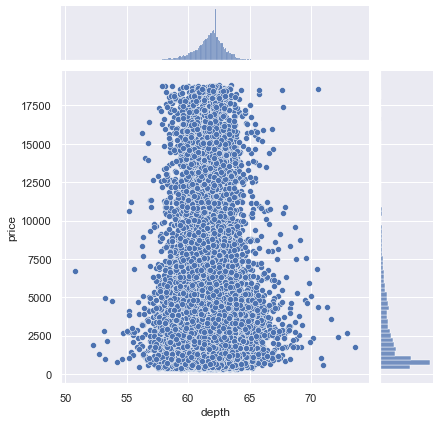

In [34]:
plt.figure(figsize=(12,8))
sns.jointplot(zirconia['depth'], zirconia['price']);
plt.show()

### Count plot of categorical variables

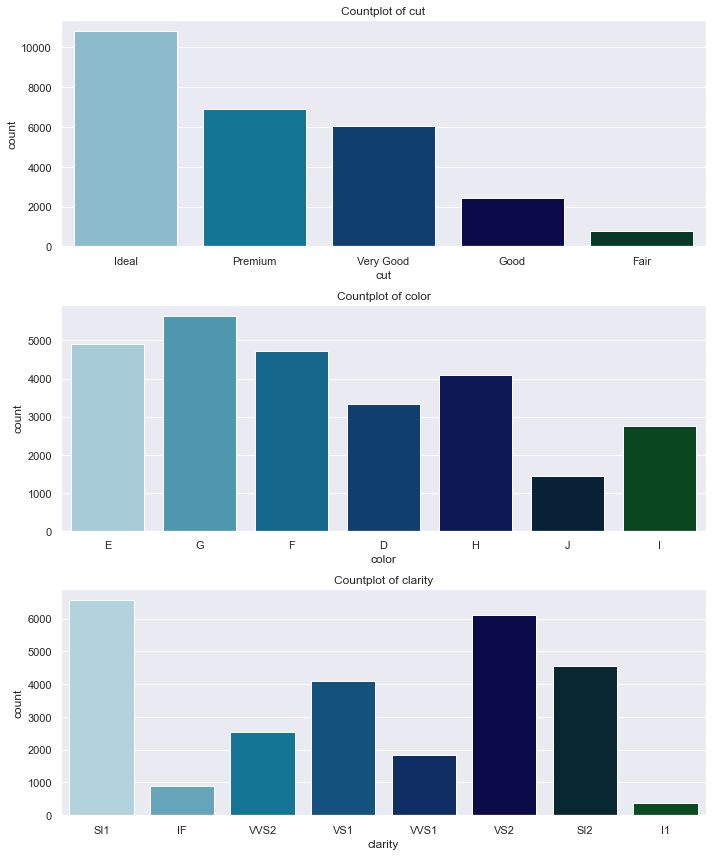

In [35]:
plt.figure(figsize = (10,12))
feature_list = df_cat.columns
for i in range(len(feature_list)):
    plt.subplot(3, 1, i + 1)
    sns.countplot(x = df_cat[feature_list[i]],  data = zirconia, palette='ocean_r')
    plt.title('Countplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Categorical variables vs Price

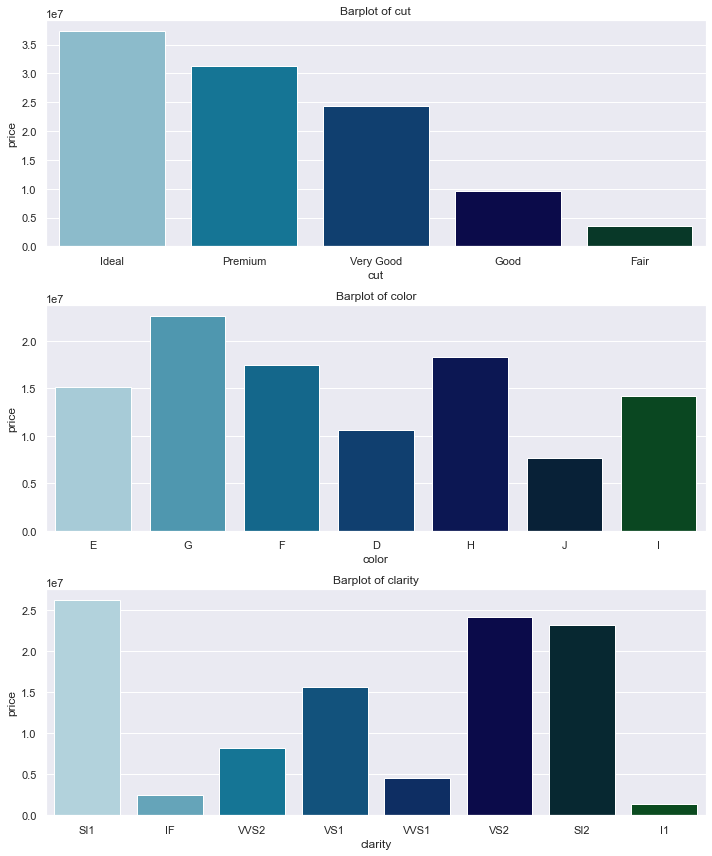

In [36]:
plt.figure(figsize = (10,12))
feature_list = df_cat.columns
for i in range(len(feature_list)):
    plt.subplot(3, 1, i + 1)
    sns.barplot(x = df_cat[feature_list[i]], y = 'price',  data = zirconia, ci=None, estimator=np.sum, palette='ocean_r')
    plt.title('Barplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Multivariate Amalysis

#### Heat map
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values 
closer to zero indicate that there is no linear trend between the two variables. Closer to 1 the correlation is, more 
positively correlated are the variables that is as one increases so does the other. A correlation closer to -1 is similar, 
but instead of both increasing one variable will decrease as the other increases

In [37]:
corr=zirconia.corr()

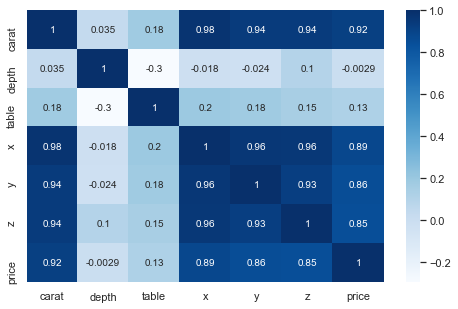

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Blues');
plt.show()

### Observations:
1.	Carat is highly correlated with price. Carat attribute is the best predictor of price.
2.	Depth is not related with price, so it depth attribute does not play major role in prediction of price.
3.	X (Length), Y (Width) and Z (Height) are highly correlated with price.
4.	X (Length), Y (Width) and Z (Height) are highly correlated with each other and are responsible for high multicollinearity.
5.	Multicollinearity is a set back for the linear resgression model. The highly correlated values can be dropped in one of the model building and check the model performance.


### Description of Categorical variables with respect to target variable 'price'

In [39]:
cut_grp = zirconia.groupby('cut')
cut_grp['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,780.0,4568.096154,3745.800173,369.0,2117.0,3342.5,5430.0,18574.0
Good,2435.0,3926.336756,3621.197004,335.0,1157.0,3087.0,5111.5,18707.0
Ideal,10805.0,3454.820639,3869.198651,326.0,872.0,1762.0,4668.0,18804.0
Premium,6886.0,4544.558525,4320.888420,326.0,1038.5,3116.5,6268.5,18795.0
Very Good,6027.0,4032.267961,4016.865952,336.0,910.0,2633.0,5438.0,18818.0


In [40]:
color_grp = zirconia.groupby('color')
color_grp['price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,3341.0,3184.827597,3419.875831,357.0,910.0,1799.0,4265.00,18526.0
E,4916.0,3073.940399,3397.600817,326.0,882.0,1698.0,3892.75,18731.0
F,4723.0,3699.944527,3807.933672,357.0,947.5,2281.0,4862.00,18791.0
G,5653.0,4005.046170,4057.515127,361.0,932.0,2274.0,6097.00,18818.0
H,4095.0,4477.932112,4249.859962,337.0,990.5,3398.0,5950.50,18795.0
I,2765.0,5124.816637,4728.462914,336.0,1145.0,3733.0,7292.00,18795.0
J,1440.0,5329.706250,4488.011962,335.0,1843.0,4234.5,7592.00,18701.0


In [41]:
clarity_grp = zirconia.groupby('clarity')
clarity_grp['price'].describe()

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
I1,364.0,3908.750000,2783.353422,345.0,2077.00,3471.5,5003.00,18531.0
IF,891.0,2739.534231,3738.032592,369.0,891.00,1063.0,2291.00,18552.0
SI1,6565.0,3998.635644,3829.728686,326.0,1090.00,2797.0,5266.00,18818.0
SI2,4564.0,5088.869413,4287.309747,326.0,2272.50,4077.0,5829.00,18804.0
VS1,4087.0,3838.752386,4051.412698,338.0,877.00,1949.0,6123.50,18795.0
VS2,6093.0,3965.496964,4118.691706,357.0,876.00,2066.0,6072.00,18791.0
VVS1,1839.0,2502.874388,3344.705599,336.0,814.00,1066.0,2217.50,18445.0
VVS2,2530.0,3263.042688,3829.353531,336.0,791.75,1253.0,3583.75,18718.0


In [42]:
zirconia.shape

(26933, 10)

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [43]:
zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Imputing null values in 'depth' by its median

In [44]:
zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [45]:
for column in zirconia.columns:
    if column == 'depth':
        median = zirconia[column].median()
        zirconia[column] = zirconia[column].fillna(median)    
        
zirconia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [46]:
zirconia.shape

(26933, 10)

### Checking the values which are equal to zero

In [47]:
zirconia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [48]:
zirconia[((zirconia['x']==0) | (zirconia['y']==0) | (zirconia['z']==0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [49]:
zirconia.drop(zirconia[((zirconia['x'] == 0) | (zirconia['y'] == 0) | (zirconia['z'] == 0))].index, inplace=True)

In [50]:
zirconia.shape

(26925, 10)

In [51]:
zirconia.describe()

,carat,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,61.746982,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,1.393457,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


From the Describe we can see that the variables: X, Y and Z has 0 has the minimum values which is practically not true.
Futher checking the rows with 0 values and dropping the rows since the number of rows with 0 values are minimal in count and dropped dataset can be used for futher implementations.

### Treating Outliers 

**Visualizing Box plot before treatment**

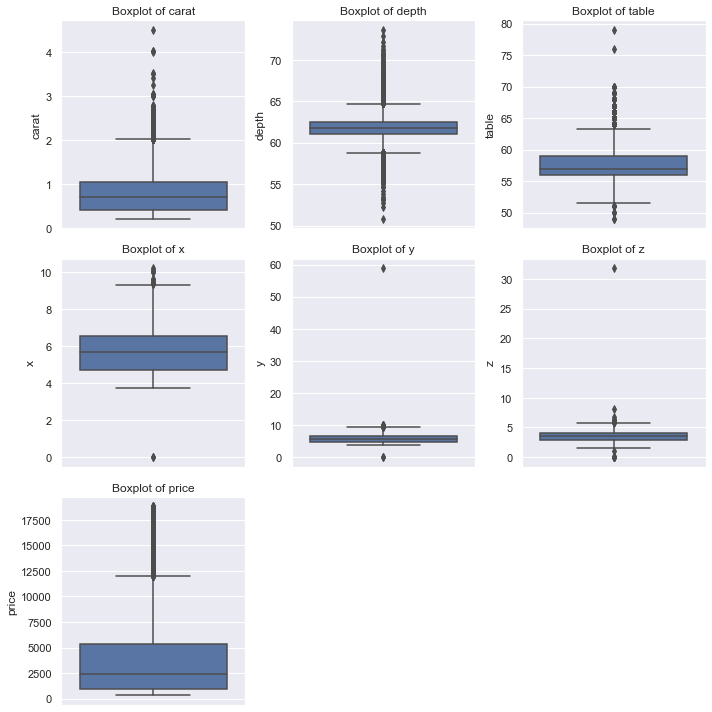

In [52]:
plt.figure(figsize = (10,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [53]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [54]:
for column in df_num.columns:
    lr,ur=remove_outlier(zirconia[column])
    zirconia[column]=np.where(zirconia[column]>ur,ur,zirconia[column])
    zirconia[column]=np.where(zirconia[column]<lr,lr,zirconia[column])

In [55]:
df_num = zirconia.select_dtypes(['float64','int64'])

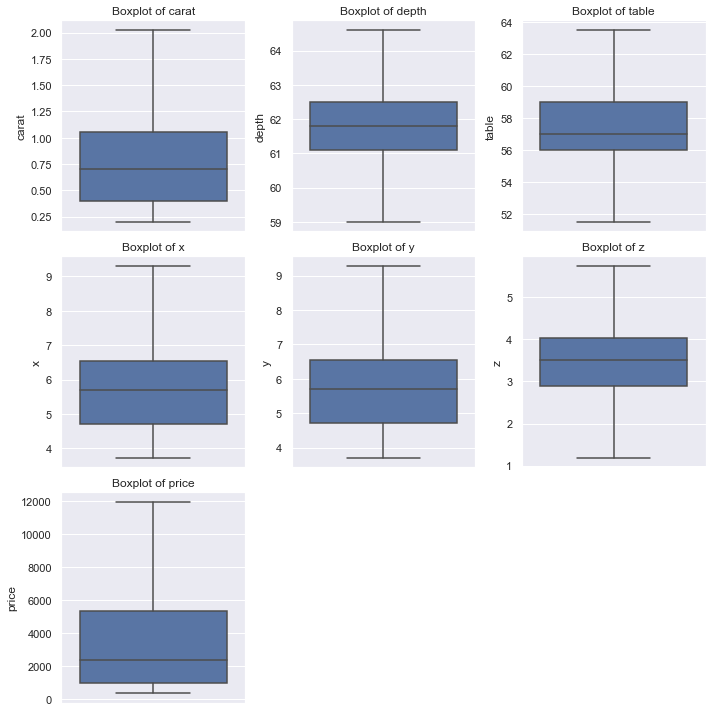

In [56]:
plt.figure(figsize = (10,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [57]:
zirconia.shape

(26925, 10)

In [58]:
### Drop the missing values

### Data Encoding for Categorical Variables

***An ordinal encoding involves mapping each unique label to an integer value***.

This type of encoding is really only appropriate, in this situation where the relationship or order is already known between the categories, which is clearly mentioned in Data dictionary.

From the Data dictionary we can see that all the categorical values are defined in the ordinal form. 
- Cut: Describe the cut quality of the cubic zirconia where quality is increasing order Fair, Good, Very Good, Premium, Ideal; Fair being the least quailty and Ideal being the best in quailty.(The categories are mapped from 1 to 5, 1 being the best i.e. for 'Ideal')
- Color: Colour of the cubic zirconia in which the color with D being the worst and J the best. (The categories are mapped from 1 to 7, 1 being the best i.e. J)
- Clarity: Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, I1, Here IF being the worst and l1 being the best. (The categories are mapped from 1 to 8, 1 being the best i.e. I1)

In [59]:
zirconia['cut_c'] = zirconia['cut'].map({'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5})

In [60]:
zirconia['color_c'] = zirconia['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3, 'I':2, 'J':1})

In [61]:
zirconia['clarity_c'] = zirconia['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4, 'SI1':3, 'SI2':2, 'I1':1})

In [62]:
zirconia.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [63]:
zirconia.shape

(26925, 10)

### Checking the head of Dataset after encoding the Categorical variables

In [64]:
zirconia.head()

,carat,depth,table,x,y,z,price,cut_c,color_c,clarity_c
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,1,6,3
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,2,4,8
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,3,6,6
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,1,5,5
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,1,5,7


In [65]:
zirconia= zirconia.astype({"cut_c":'category', "color_c":'category', "clarity_c":'category'})

In [66]:
zirconia.dtypes

carat         float64
depth         float64
table         float64
x             float64
y             float64
z             float64
price         float64
cut_c        category
color_c      category
clarity_c    category
dtype: object

In [67]:
for column in zirconia[['cut_c', 'color_c', 'clarity_c']]:
    print(column.upper(),': ',zirconia[column].nunique())
    print(zirconia[column].value_counts().sort_index())
    print('\n')

CUT_C :  5
1    10805
2     6880
3     6027
4     2434
5      779
Name: cut_c, dtype: int64


COLOR_C :  7
1    1440
2    2765
3    4091
4    5650
5    4722
6    4916
7    3341
Name: color_c, dtype: int64


CLARITY_C :  8
1     362
2    4561
3    6564
4    6092
5    4086
6    2530
7    1839
8     891
Name: clarity_c, dtype: int64




In [68]:
zirconia.shape

(26925, 10)

### Checking for the possibility of combining the sub levels of Clarity attribute ,a ordinal variables and take actions accordingly

In [69]:
zirconia['clarity_c'].unique()

[3, 8, 6, 5, 7, 4, 2, 1]
Categories (8, int64): [3, 8, 6, 5, 7, 4, 2, 1]

In [70]:
clarity_grp = zirconia.groupby('clarity_c')
clarity_grp['price'].describe()

,count,mean,std,min,25%,50%,75%,max
clarity_c,,,,,,,,
1,362.0,3850.662983,2542.831763,345.0,2071.00,3494.0,5031.00,11965.0
2,4561.0,4738.905722,3448.488611,326.0,2273.00,4077.0,5828.00,11965.0
3,6564.0,3812.165143,3292.539153,326.0,1090.00,2795.0,5266.00,11965.0
4,6092.0,3746.075837,3537.589627,357.0,876.00,2066.0,6069.75,11965.0
5,4086.0,3652.068527,3542.705105,338.0,877.00,1949.0,6120.25,11965.0
6,2530.0,3165.168379,3547.754089,336.0,791.75,1253.0,3583.75,11965.0
7,1839.0,2424.065797,3063.527052,336.0,814.00,1066.0,2217.50,11965.0
8,891.0,2592.427609,3252.252509,369.0,891.00,1063.0,2291.00,11965.0


In [71]:
# Combining 3 with 2, 5 with 4 and 7 with 6

In [72]:
z_df = zirconia.copy()

In [73]:
z_df['clarity_c'].replace(to_replace=3, value=2, inplace=True)

In [74]:
z_df['clarity_c'].replace(to_replace=5, value=4, inplace=True)

In [75]:
z_df['clarity_c'].replace(to_replace=7, value=6, inplace=True)

In [76]:
z_df['clarity_c'].value_counts()

2    11125
4    10178
6     4369
8      891
1      362
Name: clarity_c, dtype: int64

In [77]:
z_df.astype({"clarity_c":'category'})

,carat,depth,table,x,y,z,price,cut_c,color_c,clarity_c
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,1,6,2
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,2,4,8
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,3,6,6
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,1,5,4
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,1,5,6
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408.0,2,4,2
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114.0,1,3,8
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656.0,2,6,4
26965,0.27,61.8,56.0,4.19,4.20,2.60,682.0,3,5,6


## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

## Model-1 : Considering all the variables as it is and fitting the linear regression model

#### Capture the target column into separate vectors for training set and test set

In [78]:
# Copy all the predictor variables into X dataframe
X_1 = zirconia.drop('price', axis=1)

# Copy target into the y dataframe. 
y_1 = zirconia[['price']]

#### Splitting data into training and test set (70:30)

In [79]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.30 , random_state=1)

In [80]:
print('X_train_mod1',X_train_1.shape)
print('X_test_mod1',X_test_1.shape)
print('y_train_mod1',y_train_1.shape)
print('y_test_mod1',y_test_1.shape)

X_train_mod1 (18847, 9)
X_test_mod1 (8078, 9)
y_train_mod1 (18847, 1)
y_test_mod1 (8078, 1)


### Linear Regression Model - Sklearn

#### Fit the model to the training set

In [81]:
regression_model_1 = LinearRegression()
regression_model_1.fit(X_train_1, y_train_1)

LinearRegression()

#### Finding the co-efficient of determinant

In [82]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[0][idx]))

The coefficient for carat is 8887.182245900442
The coefficient for depth is 35.446432597917344
The coefficient for table is -15.069203823159084
The coefficient for x is -1348.7213850676303
The coefficient for y is 1561.8443409182516
The coefficient for z is -970.5030385552958
The coefficient for cut_c is -113.33064005373288
The coefficient for color_c is 273.22599181271306
The coefficient for clarity_c is 436.8984753150906


#### Intercept for model

In [83]:
# Let us check the intercept for the model

intercept = regression_model_1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5164.440069032453


#### Get the score on training set

In [84]:
# R square on training data
regression_model_1.score(X_train_1, y_train_1)

0.9312287832968957

#### Get the score on test set

In [85]:
# R square on testing data
regression_model_1.score(X_test_1, y_test_1)

0.9316264205922415

#### Get the RMSE on train set

In [86]:
import sklearn.metrics as metrics

In [87]:
#RMSE on Training data
predicted_train = regression_model_1.fit(X_train_1, y_train_1).predict(X_train_1)
np.sqrt(metrics.mean_squared_error(y_train_1,predicted_train))

906.8992122331999

#### Get the RMSE on test set

In [88]:
#RMSE on Testing data
predicted_test=regression_model_1.fit(X_train_1, y_train_1).predict(X_test_1)
np.sqrt(metrics.mean_squared_error(y_test_1,predicted_test))

911.2937284982526

#### Scatter plot

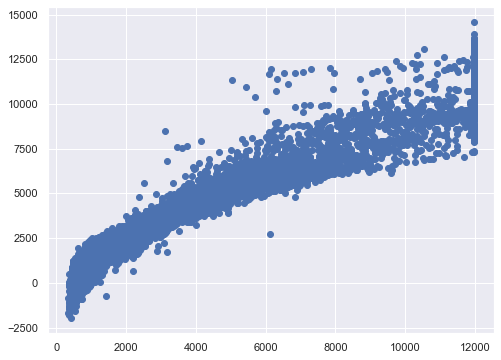

In [89]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_1['price'], regression_model_1.predict(X_test_1))
plt.show()

### Linear Regression Model- statsmodels

In [90]:
# concatenate X and y into a single dataframe
data_train_1 = pd.concat([X_train_1, y_train_1], axis=1)
data_train_1.head()

,carat,depth,table,x,y,z,cut_c,color_c,clarity_c,price
5030,1.10,63.3,56.0,6.53,6.58,4.15,4,6,2,4065.0
12108,1.01,64.0,56.0,6.30,6.38,4.06,3,7,2,5166.0
20181,0.67,60.7,61.4,5.60,5.64,3.41,4,2,4,1708.0
4712,0.76,59.0,63.0,6.05,5.97,3.47,4,4,3,2447.0
2548,1.01,62.8,59.0,6.37,6.34,3.99,2,4,5,6618.0


#### Make the linear model using OLS

In [91]:
import statsmodels.formula.api as smf
lm1_1 = smf.ols(formula= 'price ~ carat + depth + table + x + y + z + cut_c + color_c + clarity_c',
                   data = data_train_1).fit()
lm1_1.params

Intercept        -4325.016528
cut_c[T.2]         -31.214584
cut_c[T.3]        -127.536641
cut_c[T.4]        -242.704549
cut_c[T.5]        -629.950326
color_c[T.2]       531.483882
color_c[T.3]      1030.096706
color_c[T.4]      1450.536147
color_c[T.5]      1630.386225
color_c[T.6]      1672.747068
color_c[T.7]      1861.626136
clarity_c[T.2]    1712.143368
clarity_c[T.3]    2535.872401
clarity_c[T.4]    3072.131071
clarity_c[T.5]    3355.098349
clarity_c[T.6]    3766.771189
clarity_c[T.7]    3776.883566
clarity_c[T.8]    3995.216076
carat             9200.193371
depth               12.586372
table              -23.069679
x                -1176.947400
y                 1083.201384
z                 -642.480321
dtype: float64

#### Inferential statistics

In [92]:
print(lm1_1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:37:17   Log-Likelihood:            -1.5373e+05
No. Observations:               18847   AIC:                         3.075e+05
Df Residuals:                   18823   BIC:                         3.077e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4325.0165    742.591     -5.

#### Get the RMSE on training set

In [93]:
np.sqrt(lm1_1.mse_resid)

844.2923149427653

In [94]:
data_test_1 = pd.concat([X_test_1, y_test_1], axis=1)

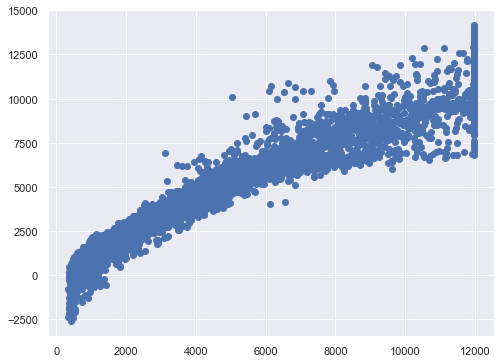

In [95]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_1['price'], lm1_1.predict(data_test_1))
plt.show()

#### Linear Equation

In [96]:
for i,j in np.array(lm1_1.params.reset_index()):
    print('({}) * {} + '.format(round(j,2),i),end='')

(-4325.02) * Intercept + (-31.21) * cut_c[T.2] + (-127.54) * cut_c[T.3] + (-242.7) * cut_c[T.4] + (-629.95) * cut_c[T.5] + (531.48) * color_c[T.2] + (1030.1) * color_c[T.3] + (1450.54) * color_c[T.4] + (1630.39) * color_c[T.5] + (1672.75) * color_c[T.6] + (1861.63) * color_c[T.7] + (1712.14) * clarity_c[T.2] + (2535.87) * clarity_c[T.3] + (3072.13) * clarity_c[T.4] + (3355.1) * clarity_c[T.5] + (3766.77) * clarity_c[T.6] + (3776.88) * clarity_c[T.7] + (3995.22) * clarity_c[T.8] + (9200.19) * carat + (12.59) * depth + (-23.07) * table + (-1176.95) * x + (1083.2) * y + (-642.48) * z + 

#### Check Multi-collinearity using VIF

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif = [variance_inflation_factor(X_1.values, ix) for ix in range(X_1.shape[1])] 

In [99]:
i=0
for column in X_1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.65490394147022
depth ---> 1126.3143618911165
table ---> 892.2124758097101
x ---> 10638.27854893691
y ---> 9419.13075753421
z ---> 3226.9583455469033
cut_c ---> 6.138962724380723
color_c ---> 8.53348426777295
clarity_c ---> 8.66162674295014


## Model 2 - Dropping the attributes 'x', 'y' & 'z' and fitting the linear regression model

#### Capture the target column into separate vectors for training set and test set

In [100]:
# Copy all the predictor variables into X dataframe
X_2 = zirconia.drop(['price', 'x', 'y', 'z'], axis=1)

# Copy target into the y dataframe. 
y_2 = zirconia[['price']]

#### Splitting data into training and test set (70:30)

In [101]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.30 , random_state=1)

In [102]:
print('X_train_mod1',X_train_2.shape)
print('X_test_mod1',X_test_2.shape)
print('y_train_mod1',y_train_2.shape)
print('y_test_mod1',y_test_2.shape)

X_train_mod1 (18847, 6)
X_test_mod1 (8078, 6)
y_train_mod1 (18847, 1)
y_test_mod1 (8078, 1)


### Linear Regression Model - Sklearn

#### Fit the model to the training set

In [103]:
regression_model_2 = LinearRegression()
regression_model_2.fit(X_train_2, y_train_2)

LinearRegression()

#### Finding the co-efficient of determinant

In [104]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_2.coef_[0][idx]))

The coefficient for carat is 7957.233009701646
The coefficient for depth is -17.60091599461744
The coefficient for table is -20.090752371797244
The coefficient for cut_c is -105.77168383079943
The coefficient for color_c is 271.88660130178056
The coefficient for clarity_c is 450.3790478005037


#### Intercept for model

In [105]:
# Let us check the intercept for the model

intercept = regression_model_2.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3136.180730563305


#### Get the score on training set

In [106]:
# R square on training data
regression_model_2.score(X_train_2, y_train_2)

0.9301661968466576

#### Get the score on test set

In [107]:
# R square on testing data
regression_model_2.score(X_test_2, y_test_2)

0.9305508599270353

#### Get the RMSE on train set

In [108]:
import sklearn.metrics as metrics

In [109]:
#RMSE on Training data
predicted_train_2 = regression_model_2.fit(X_train_2, y_train_2).predict(X_train_2)
np.sqrt(metrics.mean_squared_error(y_train_2,predicted_train_2))

913.8786213656049

#### Get the RMSE on test set

In [110]:
#RMSE on Testing data
predicted_test_2=regression_model_2.fit(X_train_2, y_train_2).predict(X_test_2)
np.sqrt(metrics.mean_squared_error(y_test_2,predicted_test_2))

918.4333803566642

#### Scatter plot

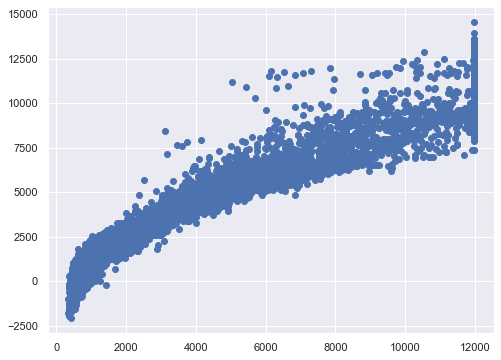

In [111]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_2['price'], regression_model_2.predict(X_test_2))
plt.show()

### Linear Regression Model- statsmodels

In [112]:
# concatenate X and y into a single dataframe
data_train_2 = pd.concat([X_train_2, y_train_2], axis=1)
data_train_2.head()

,carat,depth,table,cut_c,color_c,clarity_c,price
5030,1.10,63.3,56.0,4,6,2,4065.0
12108,1.01,64.0,56.0,3,7,2,5166.0
20181,0.67,60.7,61.4,4,2,4,1708.0
4712,0.76,59.0,63.0,4,4,3,2447.0
2548,1.01,62.8,59.0,2,4,5,6618.0


#### Make the linear model using OLS

In [113]:
import statsmodels.formula.api as smf
lm1_2 = smf.ols(formula= 'price ~ carat + depth + table + cut_c + color_c + clarity_c',
                   data = data_train_2).fit()
lm1_2.params

Intercept        -4823.837061
cut_c[T.2]         -67.169850
cut_c[T.3]        -100.098586
cut_c[T.4]        -232.578877
cut_c[T.5]        -706.731441
color_c[T.2]       529.365831
color_c[T.3]      1015.593010
color_c[T.4]      1423.102170
color_c[T.5]      1602.368896
color_c[T.6]      1655.996741
color_c[T.7]      1844.958325
clarity_c[T.2]    1747.317667
clarity_c[T.3]    2575.526703
clarity_c[T.4]    3131.498122
clarity_c[T.5]    3415.858943
clarity_c[T.6]    3853.688430
clarity_c[T.7]    3882.403672
clarity_c[T.8]    4106.882525
carat             8027.464292
depth              -10.418842
table              -22.954306
dtype: float64

#### Inferential statistics

In [114]:
print(lm1_2.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:37:18   Log-Likelihood:            -1.5389e+05
No. Observations:               18847   AIC:                         3.078e+05
Df Residuals:                   18826   BIC:                         3.080e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4823.8371    497.883     -9.

#### Get the RMSE on training set

In [115]:
np.sqrt(lm1_2.mse_resid)

851.3075797830636

In [116]:
data_test_2 = pd.concat([X_test_2, y_test_2], axis=1)

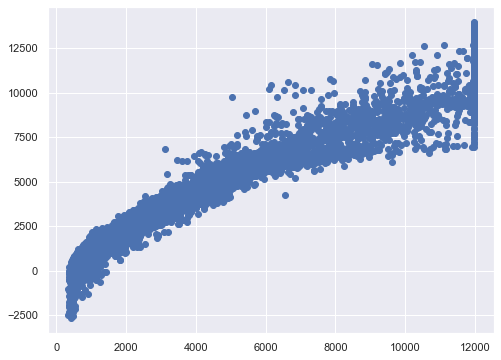

In [117]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_2['price'], lm1_2.predict(data_test_2))
plt.show()

#### Linear Equation

In [118]:
for i,j in np.array(lm1_2.params.reset_index()):
    print('({}) * {} + '.format(round(j,2),i),end='')

(-4823.84) * Intercept + (-67.17) * cut_c[T.2] + (-100.1) * cut_c[T.3] + (-232.58) * cut_c[T.4] + (-706.73) * cut_c[T.5] + (529.37) * color_c[T.2] + (1015.59) * color_c[T.3] + (1423.1) * color_c[T.4] + (1602.37) * color_c[T.5] + (1656.0) * color_c[T.6] + (1844.96) * color_c[T.7] + (1747.32) * clarity_c[T.2] + (2575.53) * clarity_c[T.3] + (3131.5) * clarity_c[T.4] + (3415.86) * clarity_c[T.5] + (3853.69) * clarity_c[T.6] + (3882.4) * clarity_c[T.7] + (4106.88) * clarity_c[T.8] + (8027.46) * carat + (-10.42) * depth + (-22.95) * table + 

#### Check Multi-collinearity using VIF

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = [variance_inflation_factor(X_2.values, ix) for ix in range(X_2.shape[1])] 

In [121]:
i=0
for column in X_2.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 5.138632848517505
depth ---> 480.09395166004856
table ---> 500.29465902799984
cut_c ---> 5.165922749512226
color_c ---> 8.477234121974698
clarity_c ---> 8.33395177559938


## Model 3 - Dropping the attributes 'x', 'y' , 'z' & 'depth' and fitting the linear regression model

#### Capture the target column into separate vectors for training set and test set

In [122]:
# Copy all the predictor variables into X dataframe
X_3 = zirconia.drop(['price', 'x', 'y', 'z', 'depth'], axis=1)

# Copy target into the y dataframe. 
y_3 = zirconia[['price']]

#### Splitting data into training and test set (70:30)

In [123]:
from sklearn.model_selection import train_test_split

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.30 , random_state=1)

In [124]:
print('X_train_mod3',X_train_3.shape)
print('X_test_mod3',X_test_3.shape)
print('y_train_mod3',y_train_3.shape)
print('y_test_mod3',y_test_3.shape)

X_train_mod3 (18847, 5)
X_test_mod3 (8078, 5)
y_train_mod3 (18847, 1)
y_test_mod3 (8078, 1)


### Linear Regression Model - Sklearn

#### Fit the model to the training set

In [125]:
regression_model_3 = LinearRegression()
regression_model_3.fit(X_train_3, y_train_3)

LinearRegression()

#### Finding the co-efficient of determinant

In [126]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_3.coef_[0][idx]))

The coefficient for carat is 7956.146166877565
The coefficient for table is -15.226520064985072
The coefficient for cut_c is -113.92419740534123
The coefficient for color_c is 272.479510071415
The coefficient for clarity_c is 451.1570717705239


#### Intercept for model

In [127]:
# Let us check the intercept for the model

intercept = regression_model_3.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4490.273447403581


#### Get the score on training set

In [128]:
# R square on training data
regression_model_3.score(X_train_3, y_train_3)

0.9301370692514421

#### Get the score on test set

In [129]:
# R square on testing data
regression_model_3.score(X_test_3, y_test_3)

0.9305028651319258

#### Get the RMSE on train set

In [130]:
import sklearn.metrics as metrics

In [131]:
#RMSE on Training data
predicted_train_3 = regression_model_3.fit(X_train_3, y_train_3).predict(X_train_3)
np.sqrt(metrics.mean_squared_error(y_train_3,predicted_train_3))

914.069190332486

#### Get the RMSE on test set

In [132]:
#RMSE on Testing data
predicted_test_3=regression_model_3.fit(X_train_3, y_train_3).predict(X_test_3)
np.sqrt(metrics.mean_squared_error(y_test_3,predicted_test_3))

918.7506802455414

#### Scatter plot

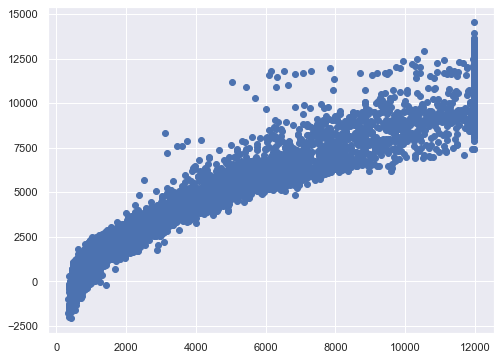

In [133]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_3['price'], regression_model_3.predict(X_test_3))
plt.show()

### Linear Regression Model- statsmodels

In [134]:
# concatenate X and y into a single dataframe
data_train_3 = pd.concat([X_train_3, y_train_3], axis=1)
data_train_3.head()

,carat,table,cut_c,color_c,clarity_c,price
5030,1.10,56.0,4,6,2,4065.0
12108,1.01,56.0,3,7,2,5166.0
20181,0.67,61.4,4,2,4,1708.0
4712,0.76,63.0,4,4,3,2447.0
2548,1.01,59.0,2,4,5,6618.0


#### Make the linear model using OLS

In [135]:
import statsmodels.formula.api as smf
lm1_3 = smf.ols(formula= 'price ~ carat + table + cut_c + color_c + clarity_c',
                   data = data_train_3).fit()
lm1_3.params

Intercept        -5621.252360
cut_c[T.2]         -70.018341
cut_c[T.3]        -106.592448
cut_c[T.4]        -247.619625
cut_c[T.5]        -729.909773
color_c[T.2]       529.250008
color_c[T.3]      1015.984090
color_c[T.4]      1423.818795
color_c[T.5]      1603.850250
color_c[T.6]      1657.388931
color_c[T.7]      1846.713746
clarity_c[T.2]    1749.484442
clarity_c[T.3]    2576.905893
clarity_c[T.4]    3133.635015
clarity_c[T.5]    3418.945654
clarity_c[T.6]    3856.723289
clarity_c[T.7]    3885.595935
clarity_c[T.8]    4112.157453
carat             8026.742954
table              -20.245718
dtype: float64

#### Inferential statistics

In [136]:
print(lm1_3.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.538e+04
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:37:19   Log-Likelihood:            -1.5389e+05
No. Observations:               18847   AIC:                         3.078e+05
Df Residuals:                   18827   BIC:                         3.080e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5621.2524    207.433    -27.

#### Get the RMSE on training set

In [137]:
np.sqrt(lm1_3.mse_resid)

851.3551440886911

In [138]:
data_test_3 = pd.concat([X_test_3, y_test_3], axis=1)

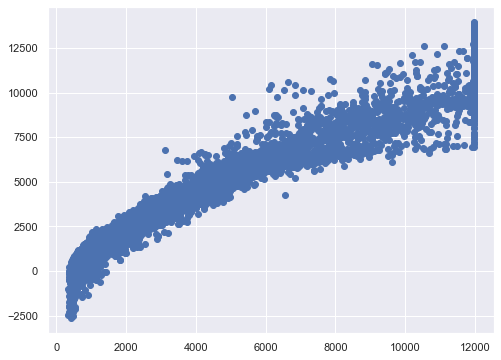

In [139]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_3['price'], lm1_3.predict(data_test_3))
plt.show()

#### Linear Equation

In [140]:
for i,j in np.array(lm1_3.params.reset_index()):
    print('({}) * {} + '.format(round(j,2),i),end='')

(-5621.25) * Intercept + (-70.02) * cut_c[T.2] + (-106.59) * cut_c[T.3] + (-247.62) * cut_c[T.4] + (-729.91) * cut_c[T.5] + (529.25) * color_c[T.2] + (1015.98) * color_c[T.3] + (1423.82) * color_c[T.4] + (1603.85) * color_c[T.5] + (1657.39) * color_c[T.6] + (1846.71) * color_c[T.7] + (1749.48) * clarity_c[T.2] + (2576.91) * clarity_c[T.3] + (3133.64) * clarity_c[T.4] + (3418.95) * clarity_c[T.5] + (3856.72) * clarity_c[T.6] + (3885.6) * clarity_c[T.7] + (4112.16) * clarity_c[T.8] + (8026.74) * carat + (-20.25) * table + 

#### Check Multi-collinearity using VIF

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
vif = [variance_inflation_factor(X_3.values, ix) for ix in range(X_3.shape[1])] 

In [143]:
i=0
for column in X_3.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 5.137344729116566
table ---> 34.373679445889046
cut_c ---> 5.036820239177246
color_c ---> 8.425690234941365
clarity_c ---> 8.165917118475038


## Model 4 - Dropping the attributes 'x', 'y','z', 'depth' and grouping sub categories of 'clarity' attribute and fitting the linear regression model

**z_df** - dataframe is above generating by grouping the sub-categories of 'Clarity' in which, Combining 3 with 2, 5 with 4 and 7 with 6

#### Capture the target column into separate vectors for training set and test set

In [144]:
# Copy all the predictor variables into X dataframe
X_4 = z_df.drop(['price', 'x', 'y', 'z','depth'], axis=1)

# Copy target into the y dataframe. 
y_4 = z_df[['price']]

#### Splitting data into training and test set (70:30)

In [145]:
from sklearn.model_selection import train_test_split

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.30 , random_state=1)

In [146]:
print('X_train_mod4',X_train_4.shape)
print('X_test_mod4',X_test_4.shape)
print('y_train_mod4',y_train_4.shape)
print('y_test_mod4',y_test_4.shape)

X_train_mod4 (18847, 5)
X_test_mod4 (8078, 5)
y_train_mod4 (18847, 1)
y_test_mod4 (8078, 1)


### Linear Regression Model - Sklearn

#### Fit the model to the training set

In [147]:
regression_model_4 = LinearRegression()
regression_model_4.fit(X_train_4, y_train_4)

LinearRegression()

#### Finding the co-efficient of determinant

In [148]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_4.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_4.coef_[0][idx]))

The coefficient for carat is 7861.428694376872
The coefficient for table is -17.17005364009355
The coefficient for cut_c is -117.61394278203296
The coefficient for color_c is 260.6060552289523
The coefficient for clarity_c is 407.7462698772857


#### Intercept for model

In [149]:
# Let us check the intercept for the model

intercept = regression_model_4.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3878.169478282383


#### Get the score on training set

In [150]:
# R square on training data
regression_model_4.score(X_train_4, y_train_4)

0.9247794902657087

#### Get the score on test set

In [151]:
# R square on testing data
regression_model_4.score(X_test_4, y_test_4)

0.9250967599479534

#### Get the RMSE on train set

In [152]:
import sklearn.metrics as metrics

In [153]:
#RMSE on Training data
predicted_train_4 = regression_model_4.fit(X_train_4, y_train_4).predict(X_train_4)
np.sqrt(metrics.mean_squared_error(y_train_4,predicted_train_4))

948.4704541885391

#### Get the RMSE on test set

In [154]:
#RMSE on Testing data
predicted_test_4=regression_model_4.fit(X_train_4, y_train_4).predict(X_test_4)
np.sqrt(metrics.mean_squared_error(y_test_4,predicted_test_4))

953.8158290575849

#### Scatter plot

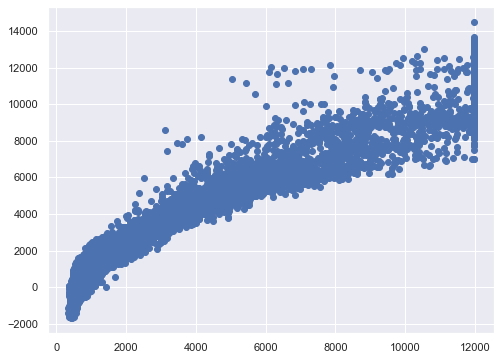

In [155]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_4['price'], regression_model_4.predict(X_test_4))
plt.show()

### Linear Regression Model- statsmodels

In [156]:
# concatenate X and y into a single dataframe
data_train_4 = pd.concat([X_train_4, y_train_4], axis=1)
data_train_4.head()

,carat,table,cut_c,color_c,clarity_c,price
5030,1.10,56.0,4,6,2,4065.0
12108,1.01,56.0,3,7,2,5166.0
20181,0.67,61.4,4,2,4,1708.0
4712,0.76,63.0,4,4,2,2447.0
2548,1.01,59.0,2,4,4,6618.0


#### Make the linear model using OLS

In [157]:
import statsmodels.formula.api as smf
lm1_4 = smf.ols(formula= 'price ~ carat + table + cut_c + color_c + clarity_c',
                   data = data_train_4).fit()
lm1_4.params

Intercept        -5326.173767
cut_c[T.2]         -75.270954
cut_c[T.3]         -94.898055
cut_c[T.4]        -242.029667
cut_c[T.5]        -775.723941
color_c[T.2]       515.253315
color_c[T.3]       973.010681
color_c[T.4]      1379.299790
color_c[T.5]      1551.045760
color_c[T.6]      1591.273298
color_c[T.7]      1775.285874
clarity_c[T.2]    2202.475290
clarity_c[T.4]    3188.594947
clarity_c[T.6]    3788.512158
clarity_c[T.8]    4021.814441
carat             7916.856527
table              -22.110837
dtype: float64

#### Inferential statistics

In [158]:
print(lm1_4.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:37:20   Log-Likelihood:            -1.5481e+05
No. Observations:               18847   AIC:                         3.096e+05
Df Residuals:                   18830   BIC:                         3.098e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5326.1738    217.636    -24.

#### Get the RMSE on training set

In [159]:
np.sqrt(lm1_4.mse_resid)

893.7156504951786

In [160]:
data_test_4 = pd.concat([X_test_4, y_test_4], axis=1)

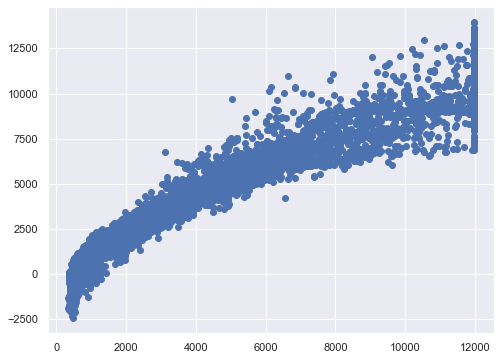

In [161]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_4['price'], lm1_4.predict(data_test_4))
plt.show()

#### Linear Equation

In [162]:
for i,j in np.array(lm1_4.params.reset_index()):
    print('({}) * {} + '.format(round(j,2),i),end='')

(-5326.17) * Intercept + (-75.27) * cut_c[T.2] + (-94.9) * cut_c[T.3] + (-242.03) * cut_c[T.4] + (-775.72) * cut_c[T.5] + (515.25) * color_c[T.2] + (973.01) * color_c[T.3] + (1379.3) * color_c[T.4] + (1551.05) * color_c[T.5] + (1591.27) * color_c[T.6] + (1775.29) * color_c[T.7] + (2202.48) * clarity_c[T.2] + (3188.59) * clarity_c[T.4] + (3788.51) * clarity_c[T.6] + (4021.81) * clarity_c[T.8] + (7916.86) * carat + (-22.11) * table + 

#### Check Multi-collinearity using VIF

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
vif = [variance_inflation_factor(X_4.values, ix) for ix in range(X_4.shape[1])] 

In [165]:
i=0
for column in X_4.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 5.014781525999582
table ---> 30.721836494082076
cut_c ---> 5.030393865852007
color_c ---> 8.39160381584299
clarity_c ---> 6.38478635319889


## Model 5 - Dropping the attributes 'x', 'y' , 'z' & 'depth' and fitting the linear regression model for scaled data.

#### Capture the target column into separate vectors for training set and test set

In [166]:
# Copy all the predictor variables into X dataframe
X_5 = zirconia.drop(['price', 'x', 'y', 'z', 'depth'], axis=1)

# Copy target into the y dataframe. 
y_5 = zirconia[['price']]

#### Splitting data into training and test set (70:30)

In [167]:
from sklearn.model_selection import train_test_split

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.30 , random_state=1)

In [168]:
print('X_train_mod5',X_train_5.shape)
print('X_test_mod5',X_test_5.shape)
print('y_train_mod5',y_train_5.shape)
print('y_test_mod5',y_test_5.shape)

X_train_mod5 (18847, 5)
X_test_mod5 (8078, 5)
y_train_mod5 (18847, 1)
y_test_mod5 (8078, 1)


In [169]:
from scipy.stats import zscore
X = X_5.apply(zscore)

#### Scaling the dataset

In [170]:
## scaling data and fitting again and checking the scores.

from scipy.stats import zscore

X_train_scaled  = X_train_5.apply(zscore)
X_test_scaled = X_test_5.apply(zscore)
y_train_scaled = y_train_5.apply(zscore)
y_test_scaled = y_test_5.apply(zscore)

### Linear Regression Model - Sklearn

#### Fit the model to the training set

In [171]:
regression_model_5 = LinearRegression()
regression_model_5.fit(X_train_scaled , y_train_scaled)

LinearRegression()

#### Finding the co-efficient of determinant

In [172]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_5.coef_[0][idx]))

The coefficient for carat is 1.0580025633434904
The coefficient for table is -0.009494734169229253
The coefficient for cut_c is -0.03664855966671572
The coefficient for color_c is 0.13427496894739407
The coefficient for clarity_c is 0.2151144567745126


#### Intercept for model

In [173]:
# Let us check the intercept for the model

intercept = regression_model_5.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.7250316600720026e-16


#### Get the score on training set

In [174]:
# R square on training data
regression_model_5.score(X_train_scaled, y_train_scaled)

0.9301370692514421

#### Get the score on test set

In [175]:
# R square on testing data
regression_model_5.score(X_test_scaled, y_test_scaled)

0.93047095390445

#### Get the RMSE on train set

In [176]:
import sklearn.metrics as metrics

In [177]:
#RMSE on Training data
predicted_train_5 = regression_model_5.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train_5))

0.2643159676382754

#### Get the RMSE on test set

In [178]:
#RMSE on Testing data
predicted_test_5=regression_model_5.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test_5))

0.2636836098348739

#### Scatter plot

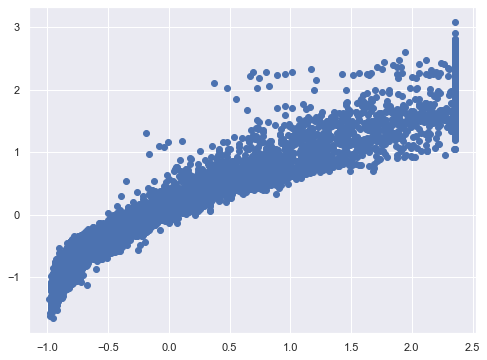

In [179]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_scaled['price'], regression_model_5.predict(X_test_scaled))
plt.show()

### Linear Regression Model- statsmodels

In [180]:
# concatenate X and y into a single dataframe
data_train_5 = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_train_5.head()

,carat,table,cut_c,color_c,clarity_c,price
5030,0.668077,-0.660885,1.716974,0.942034,-1.243104,0.097115
12108,0.472372,-0.660885,0.818090,1.528825,-1.243104,0.415485
20181,-0.266960,1.843240,1.716974,-1.405128,-0.030183,-0.584445
4712,-0.071254,2.585202,1.716974,-0.231547,-0.636644,-0.370752
2548,0.472372,0.730295,-0.080793,-0.231547,0.576277,0.835351


#### Make the linear model using OLS

In [181]:
import statsmodels.formula.api as smf
lm1_5 = smf.ols(formula= 'price ~ carat + table + cut_c + color_c + clarity_c',
                   data = data_train_5).fit()
lm1_5.params

Intercept   -4.033232e-17
carat        1.058003e+00
table       -9.494734e-03
cut_c       -3.664856e-02
color_c      1.342750e-01
clarity_c    2.151145e-01
dtype: float64

#### Inferential statistics

In [182]:
print(lm1_5.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.017e+04
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:37:21   Log-Likelihood:                -1664.7
No. Observations:               18847   AIC:                             3341.
Df Residuals:                   18841   BIC:                             3389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.033e-17      0.002  -2.09e-14      1.0

#### Get the RMSE on training set

In [183]:
np.sqrt(lm1_5.mse_resid)

0.2643580505841658

In [184]:
data_test_5 = pd.concat([X_test_scaled, y_test_scaled], axis=1)

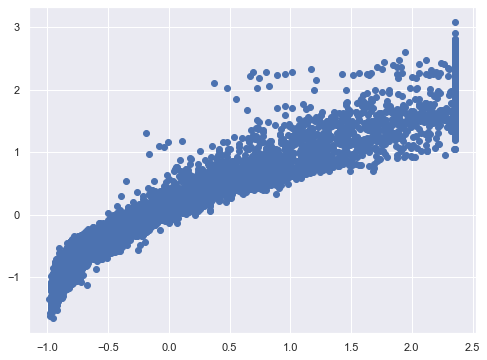

In [185]:
plt.figure(figsize = (8,6))
plt.scatter(y_test_scaled['price'], lm1_5.predict(data_test_5))
plt.show()

#### Linear Equation

In [186]:
for i,j in np.array(lm1_5.params.reset_index()):
    print('({}) * {} + '.format(round(j,2),i),end='')

(-0.0) * Intercept + (1.06) * carat + (-0.01) * table + (-0.04) * cut_c + (0.13) * color_c + (0.22) * clarity_c + 

#### Check Multi-collinearity using VIF

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [188]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [189]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 1.30155395589329
table ---> 1.2632339639911656
cut_c ---> 1.2570332894546756
color_c ---> 1.1153449236143709
clarity_c ---> 1.193835288526028


## Model Comparison

In [190]:
Models = pd.read_excel('model_comparison.xlsx')

In [191]:
Models

,Model comparison,Intercept,Sk_learn_Rsq_train,Sk_learn_Rsq_test,Sk_learn_RMSE_train,Sk_learn_RMSE_test,Stat_Rsq,Stat_Adj_Rsq,Stat_RMSE,VIF_max,VIF_min
0,Model 1,-5.164440e+03,0.9312,0.9316,906.8900,911.2900,0.940,0.940,844.290,10638.270,6.138
1,Model 2,-3.136180e+03,0.9301,0.9305,914.8700,918.4300,0.939,0.939,851.300,500.290,5.165
2,Model 3,-4.490270e+03,0.9301,0.9301,914.0600,918.7500,0.939,0.939,851.350,34.373,5.135
3,Model 4,-3.871690e+02,0.9240,0.9250,948.4700,953.8100,0.933,0.933,839.710,30.720,5.014
4,Model 5,-2.720000e-16,0.9301,0.9304,0.2643,0.2636,0.930,0.930,0.264,1.301,1.115


•	Accuracy (R square) is same for all models for both sklearn as well as stat models.
•	Model 1, 3 and 5 give us the best RMSE values.
•	VIF max and VIF min values are lowest for models 5, since that data is scaled.
•	In model 4, even after combining the sub categories of attributes the RMSE score for train and test is more compared to other model, so the idea of combining sub categories is dropped.
•	Model 3 and 5 using same attributes while one model is built using scaled attributes and other is original dataset. 
•	Model 5 is our best fit model and most viable for the given set based on the performance measures of other models.

Final linear equation is as given below:

(-0.0) * Intercept + (1.06) * carat + (-0.01) * table + (-0.04) * cut_c + (0.13) * color_c + (0.22) * clarity_c

The best 5 attributes which are good predictors for prediction of price are as follows:

1)	Carat
2)	Clarity
3)	Color
4)	Cut
5)	Table


## Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

#### Data Dictionary:
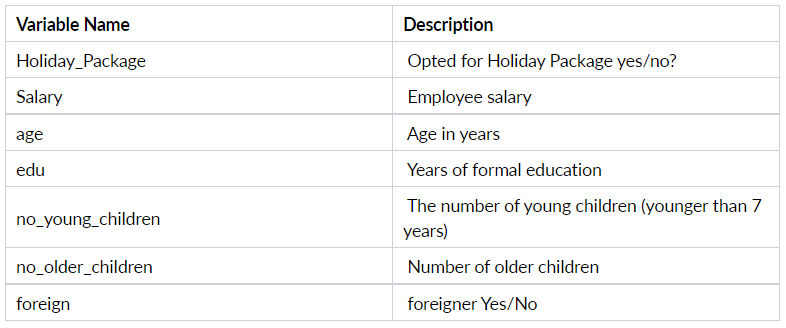

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### Read and view data

In [192]:
Holiday_df = pd.read_csv("Holiday_Package.csv")

In [193]:
Holiday_df.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [194]:
Holiday_df.drop('Unnamed: 0', axis=1, inplace=True)

In [195]:
Holiday_df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


### Data Pre-processing

###### Checking for number of rows and columns:

In [196]:
Holiday_df.shape

(872, 7)

###### Checking for the information of features:

In [197]:
Holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


###### Checking for Null and missing values in the dataset :

In [198]:
Holiday_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

###### Checking the Skewness and Kurtosis

In [199]:
Holiday_df.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [200]:
Holiday_df.kurt()

Salary               15.852557
age                  -0.909962
educ                  0.005558
no_young_children     3.109892
no_older_children     0.676017
dtype: float64

###### Checking the description of dataset

In [201]:
Holiday_df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Checking for duplicates in this dataset :

In [202]:
# Are there any duplicates?
dups = Holiday_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Holiday_df[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


### Observations:
-	Dataset has 7 columns and 872 rows excluding the 'unnamed:0' column.
-	The first column "Unnamed: 0" has only serial numbers, so we can drop it as it is not useful.
-	There are both categorical and continuous data. For categorical data, we have 'Holiday_package' and 'foreign', for continuous data we have salary, age, educ, no_young_children, no_older_children.
-	Holliday_Package will be target variable.
-	The dataset is used  in predicting whether an employee will opt for the Holiday_package or not on the basis of the information given in the data set. 
-	There are no missing and duplicate values in the dataset.
-	There is total 5 unique types of 'cut' out of which the highest number of cut is 'Ideal' one which accounts to almost 10816 of observations, which is approximately 50% of the dataset.
-	Skewness and Kurtosis is also calculated for each column, Data with high skewness indicates lack of symmetry and high value of kurtosis indicates heavily tailed data.
-	Based on summary descriptive, the data looks good, we see that for most of the variables the mean/medium are nearly equal.
-  We have a balanced dataset where 54% yes values and 45% no values of Target variable.


### Data Visualization :

### Univariate Analysis for Numeric Variables:

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [203]:
df_num = Holiday_df.select_dtypes(['float64','int64'])
df_cat = Holiday_df.select_dtypes(['object'])

In [204]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(Holiday_df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(Holiday_df[column], kde= True, bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x = Holiday_df[column])
    
    plt.show()

In [205]:
df_num = Holiday_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

5

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 Distribution of Salary
----------------------------------------------------------------------------


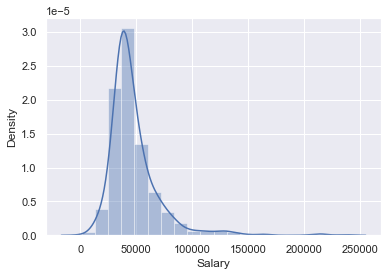

BoxPlot of Salary
----------------------------------------------------------------------------


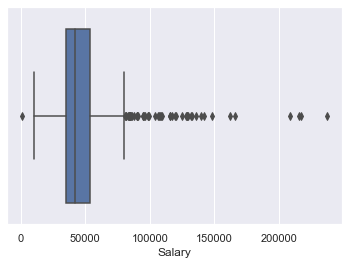

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


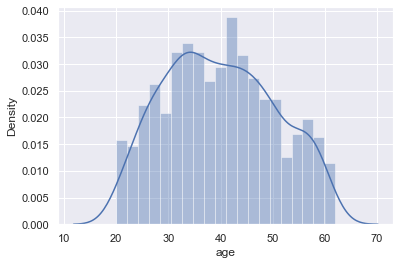

BoxPlot of age
----------------------------------------------------------------------------


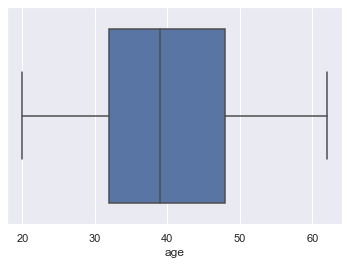

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 Distribution of educ
----------------------------------------------------------------------------


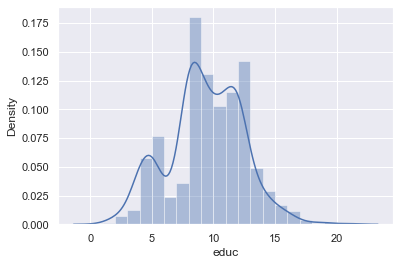

BoxPlot of educ
----------------------------------------------------------------------------


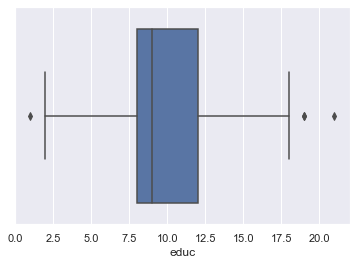

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 Distribution of no_young_children
----------------------------------------------------------------------------


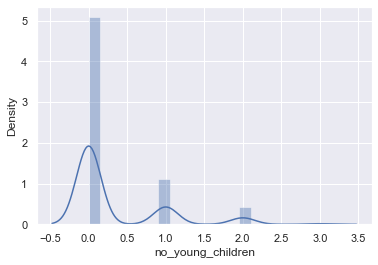

BoxPlot of no_young_children
----------------------------------------------------------------------------


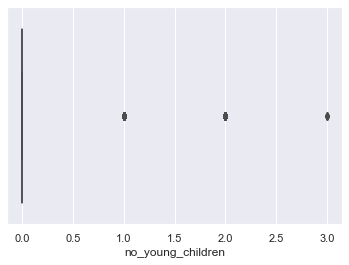

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 Distribution of no_older_children
----------------------------------------------------------------------------


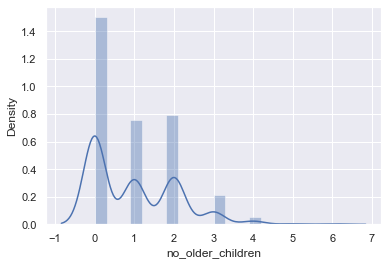

BoxPlot of no_older_children
----------------------------------------------------------------------------


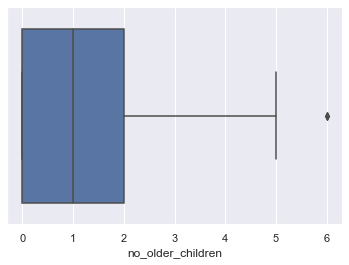

In [206]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Observations:

#### 1 - Salary
- From the above graphs, we can infer that mean 'Salary'of employee is around 47729.17 with the minimum of 1322.0 and maximum of 236961.0.
- The distribution of 'Salary' is right skewed with skewness vlaue of 3.103216.
- The dist plot shows the distribution of most of data from 1000 to 10,000 approximately.
- The box plot of the 'Salary' variable shows presence of large number of outliers.

#### 2 - Age
- From the above graphs, we can infer that mean 'Age'of employee is around 39 years with the minimum of 20yrs and maximum of 62yrs old in company.
- The distribution of 'Age' looks almost normally distrubuted with skewness vlaue of 0.146412
- The dist plot shows the distribution of most of data from 20 to 60 approximately.
- The box plot of the 'Age' variable does not have any outlier.

#### 3 - Educ: Years of formal education
- From the above graphs, we can infer that mean 'Educ' years of formal education of employee is around 9 years with the minimum of 1yr and maximum of 21yrs.
- The distribution of 'Educ' is slightly left skewws with skewness vlaue of -0.045501.
- The dist plot shows the distribution of most of data from 1 to 20 approximately.
- The box plot of the 'Educ' variable shows presence of few outliers.

#### 4 - no_young_children: The number of young children below the age of 7yrs. 
- From the above graphs, we can infer that mean 'no_young_children' number of young children below the age of 7yrs is around  0.3119 with the minimum of 0 and 3.
- The distribution of 'no_young_children' is slightly left skewed with skewness vlaue of -0.045501.
- The dist plot shows the distribution of most of data from 0-3.
- The box plot of the 'no_young_children' variable shows presence of few outliers.

#### 5 - no_older_children: The number of older children.
- From the above graphs, we can infer that mean 'no_older_children' the number of older children is around 0.9827 with the minimum of 0 and maximum of 6.
- The distribution of 'no_older_children' is slightly right skewed with skewness vlaue of 0.953951
- The dist plot shows the distribution of most of data 0-4 approximately.
- The box plot of the 'no_older_children' variable shows presence of one outlier at 6.

### Univariate Analysis for Cateforical Variables:

In [207]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [208]:
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

2

Details of Holliday_Package
----------------------------------------------------------------
no     471
yes    401
Name: Holliday_Package, dtype: int64


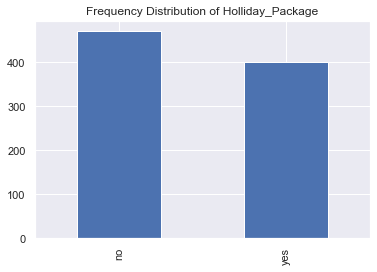

       
Details of foreign
----------------------------------------------------------------
no     656
yes    216
Name: foreign, dtype: int64


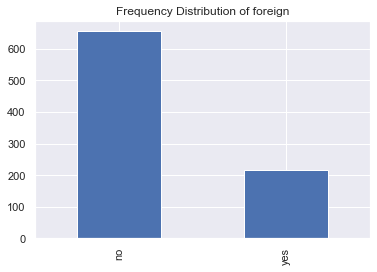

In [209]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [210]:
Holiday_df.Holliday_Package.value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [211]:
Holiday_df.foreign.value_counts(normalize = True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

### Observations:
- The distribution of the 'Holiday_package' is one where employee opt for pacakge or no, we can see that frequecy distribution of 'No' is more which is around 471 and the employees who opted are slight less which is 401 in count. 
- We can observe that 54% of the employees are not opting for the holiday package and 46% are interested in the package. This implies we have a dataset which is fairly balanced
- The frequency distribution of foreign implies that the employees are mostly from the same country which is around 75% of employees and foreigners are around 25% of them.


### Bivariate Analysis

**Pair plot**

- The Pairplot helps us to visualize how the features numerical in nature interact with each other. The 
- Pairplot further helps us visualize how the distribution of the target variables differs within each individual the feature itself.

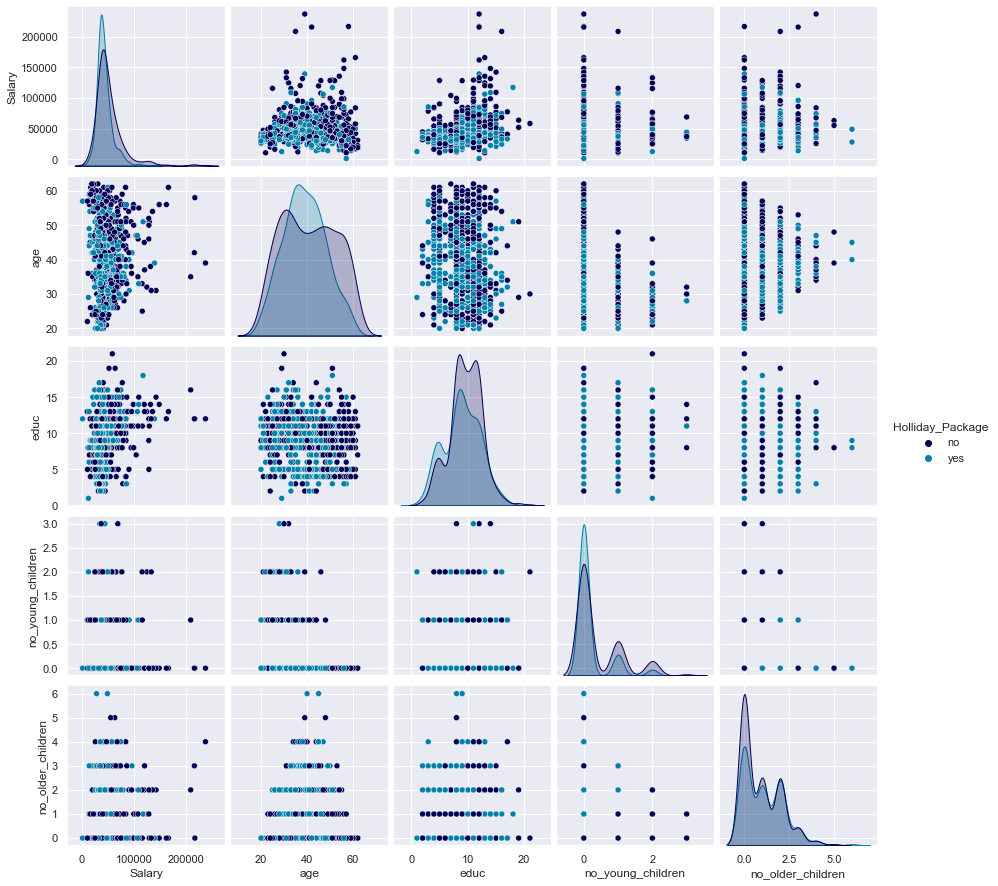

In [212]:
# Pairplot using sns
sns.pairplot(Holiday_df ,diag_kind='kde' ,hue='Holliday_Package',palette='ocean');

### Observation

- There is no obvious defined correlation between the attributes and Holiday package, the data seems to be fine.
- There is no considerable difference between data distribution of holiday package. No clear and considerable difference is observed. 
- Looking at the distribution of age, we can deduce that the employees who accept the holiday package usually tend to be in the middle of their careers (late 30s).
- Across education we can observe that the employees with higher number of years of formal education have a lower tendency to opt for the holiday package relative to employees with lesser years of formal education

### Numeric variables vs Holiday package

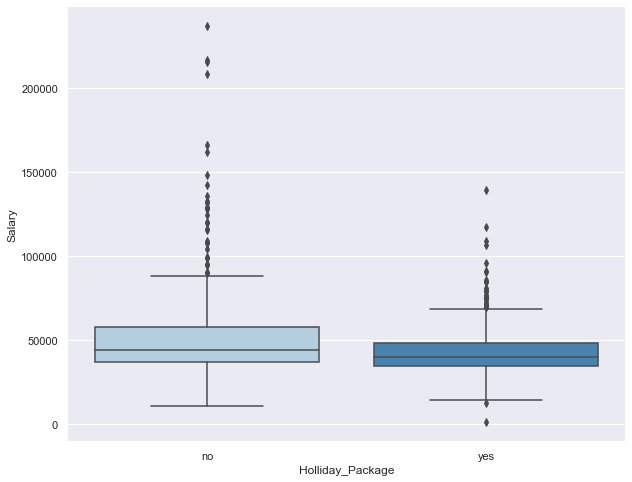

In [213]:
plt.figure(figsize=(10,8))
sns.boxplot(x= Holiday_df['Holliday_Package'], y= Holiday_df['Salary'], palette = 'Blues');

- We can see that the average 'Salary' of employees opting for holiday package and not opting for holiday package is similar in nature. However, the distribution is fairly more spread out for people not opting for holiday packages.

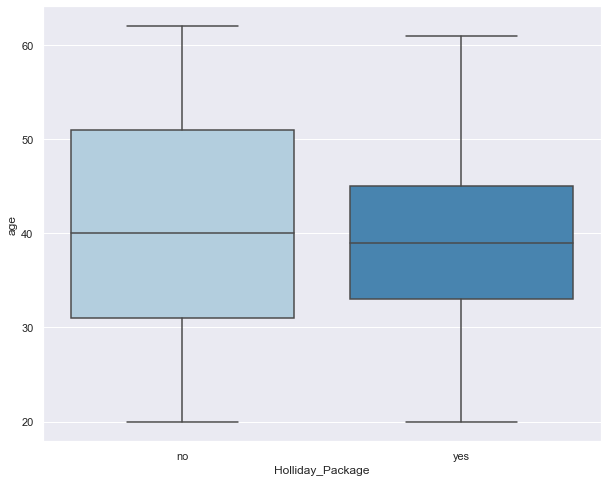

In [214]:
plt.figure(figsize=(10,8))
sns.boxplot(x= Holiday_df['Holliday_Package'], y= Holiday_df['age'], palette = 'Blues');

We can see that, the age distribution for employees who are opting for holiday package and not opting are similar in nature, though the number of people opting are less in number and mostly fall in range of 35-45 age group.

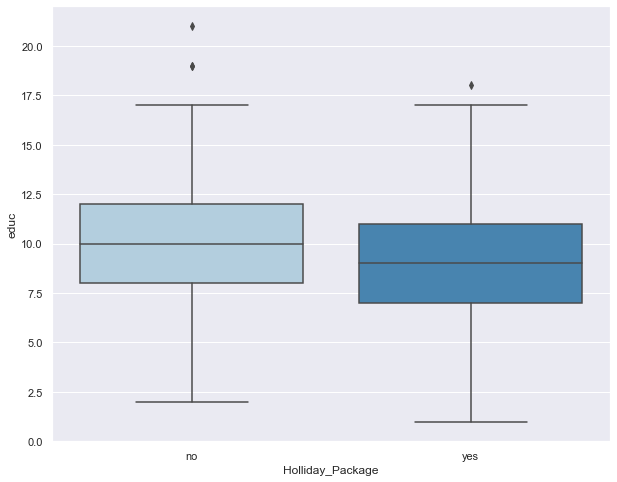

In [215]:
plt.figure(figsize=(10,8))
sns.boxplot(x= Holiday_df['Holliday_Package'], y= Holiday_df['educ'], palette = 'Blues');

The variable 'educ' the number of years of formal education is showing a similar pattern. This means education is likely not a variable that influences for opting of holiday packages for employees.

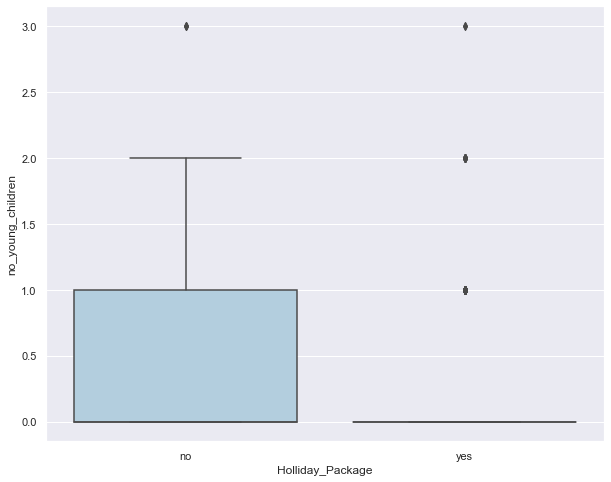

In [216]:
plt.figure(figsize=(10,8))
sns.boxplot(x= Holiday_df['Holliday_Package'], y= Holiday_df['no_young_children'], palette = 'Blues');

We can see that there is a significant difference in employees with younger children who are opting for holiday package and employees who are not opting for holiday package, this attribute is good predictor as there is significant difference in them.


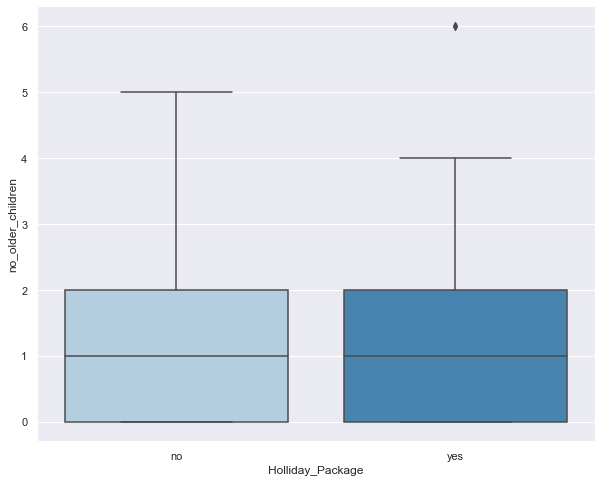

In [217]:
plt.figure(figsize=(10,8))
sns.boxplot(x= Holiday_df['Holliday_Package'], y= Holiday_df['no_older_children'], palette = 'Blues');

The distribution for opting or not opting for holiday packages looks same for employees with older children. At this point, this might not be a good predictor for model building.

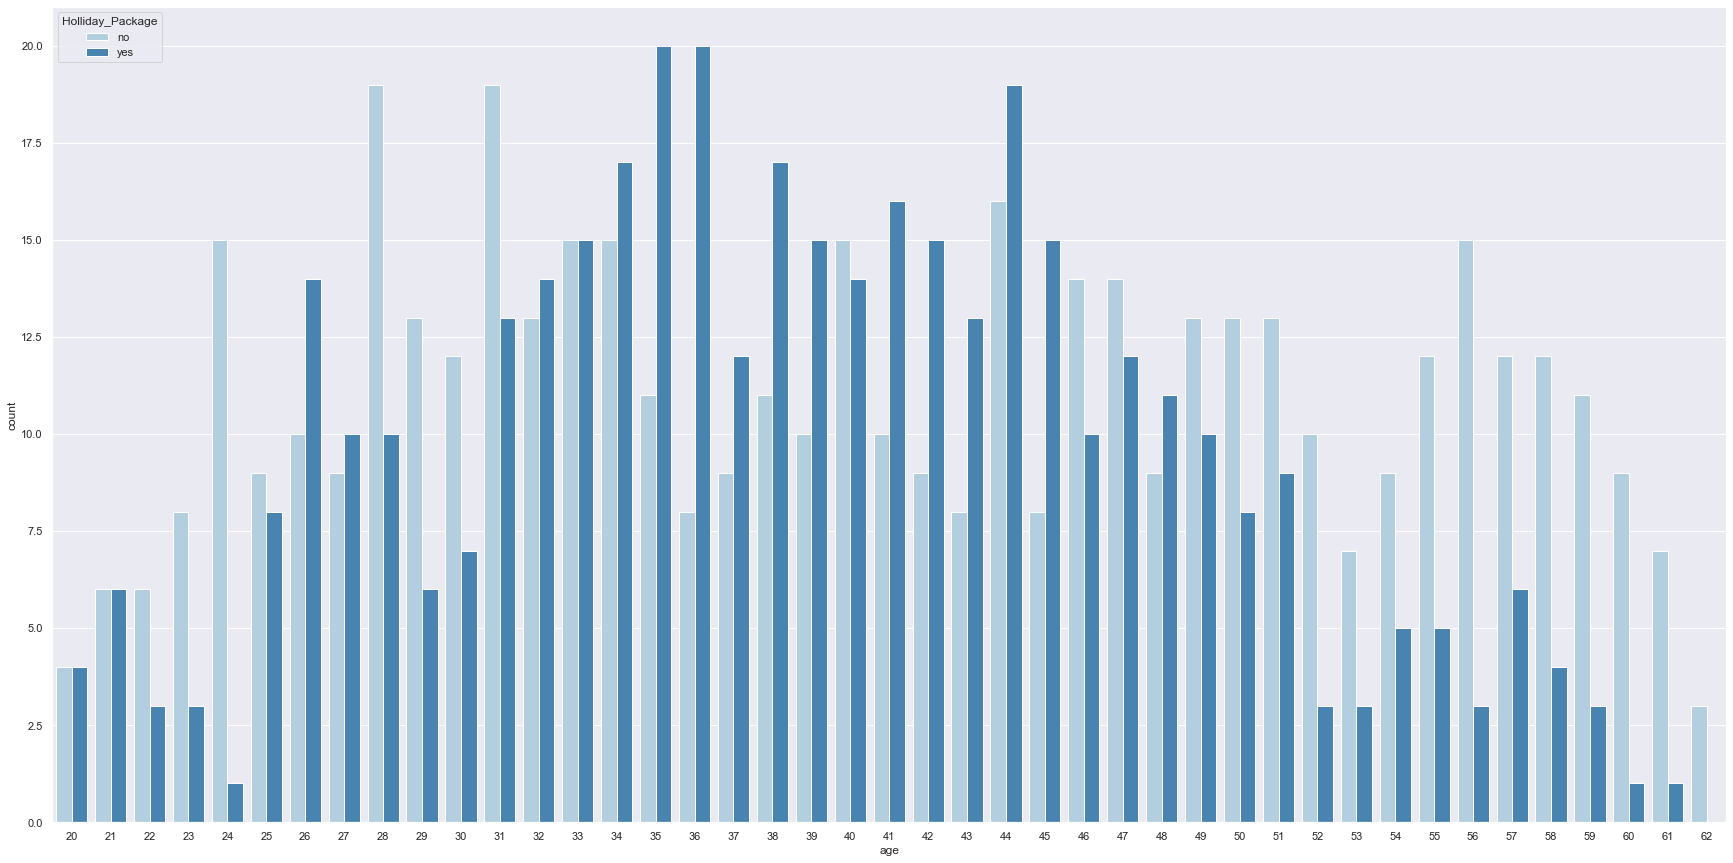

In [218]:
plt.figure(figsize=(30,15))
sns.countplot(Holiday_df['age'], hue=Holiday_df['Holliday_Package'],palette = 'Blues');

plt.show()

- We can clearly see that frequency of employees in middle range (34 to 45 years) are opting for holiday package are more as compared to older and younger employees.

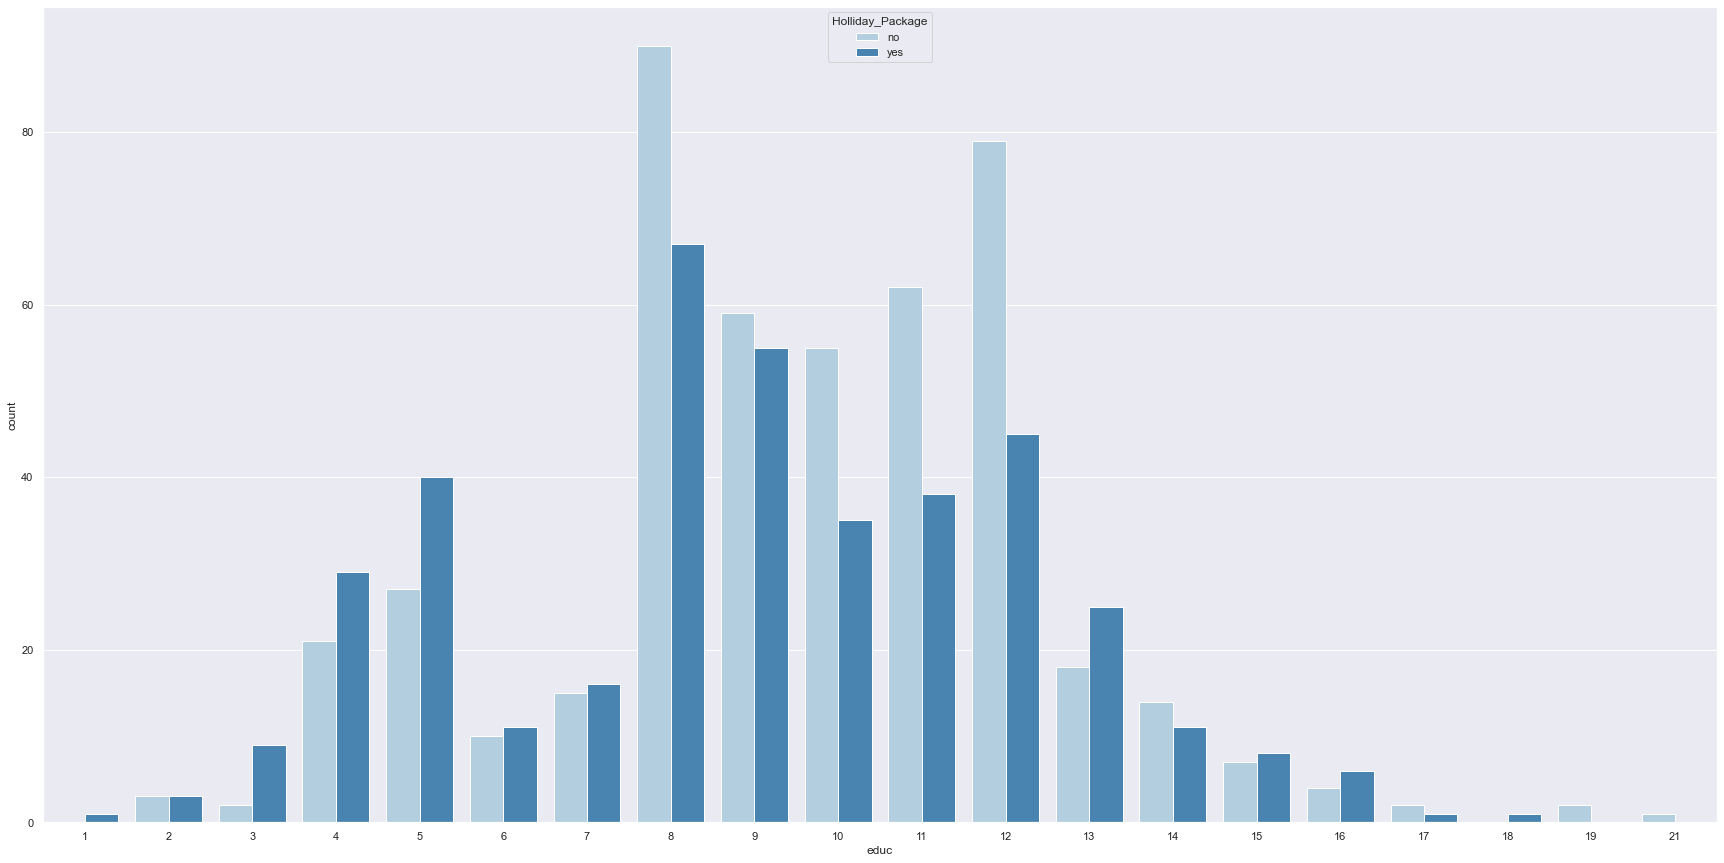

In [219]:
plt.figure(figsize=(30,15))
sns.countplot(Holiday_df['educ'], hue=Holiday_df['Holliday_Package'],palette = 'Blues');

plt.show()

We can see that employees with less years of formal education(1 to 7 years) and higher education are not opting for the Holiday package as compared to employees with formal education of 8 year to 12 years

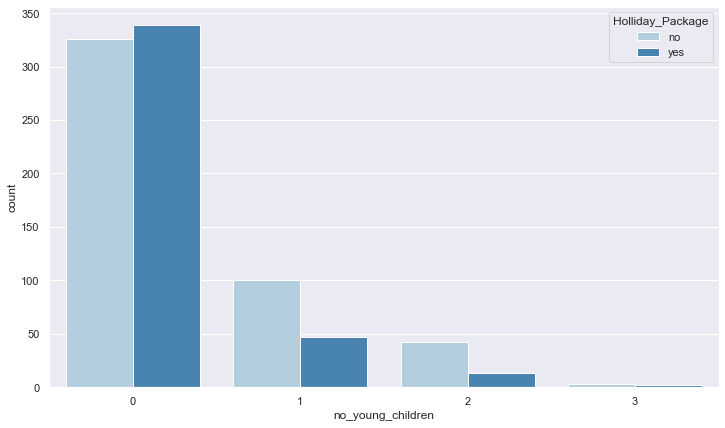

In [220]:
plt.figure(figsize=(12,7))
sns.countplot(Holiday_df['no_young_children'], hue=Holiday_df['Holliday_Package'],palette = 'Blues');

plt.show()

We can see clearly that people with younger children are opting for holiday packages are very few in number compared to employees who do not have young children.

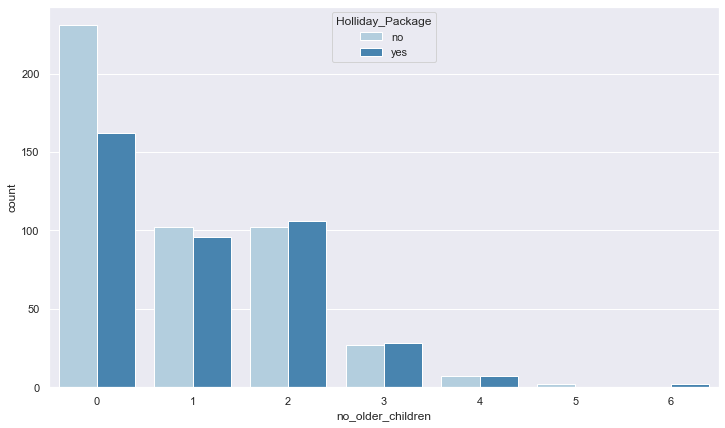

In [221]:
plt.figure(figsize=(12,7))
sns.countplot(Holiday_df['no_older_children'], hue=Holiday_df['Holliday_Package'],palette = 'Blues');

plt.show()

Almost same distribution for both the scenarios when dealing with employees with older children.

### Categorical vs Holiday package

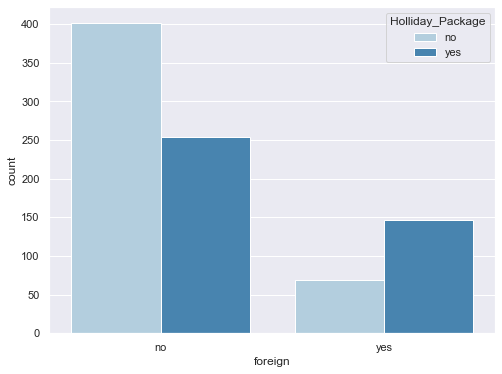

In [222]:
plt.figure(figsize=(8,6))
sns.countplot(Holiday_df['foreign'], hue=Holiday_df['Holliday_Package'],palette = 'Blues');

plt.show()

We can see that the percentage of foreigners accepting the holiday package is substantially higher compared to the citizens with considering the ratio of foreigners and the citizens.


### Multivariate Amalysis

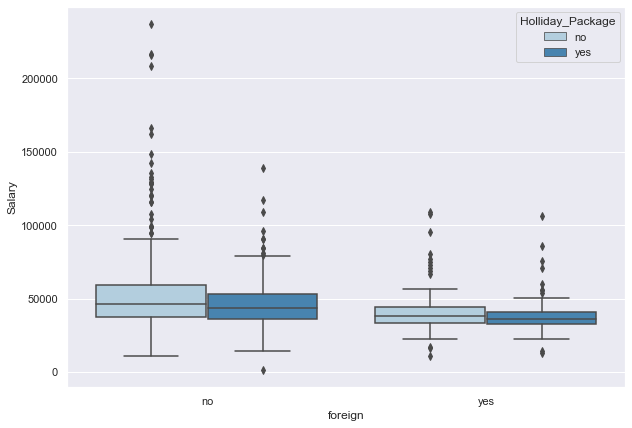

In [223]:
plt.figure(figsize=(10,7))
sns.boxplot(x = Holiday_df['foreign'], y=Holiday_df['Salary'], data = Holiday_df, hue='Holliday_Package', palette = 'Blues');
plt.show()


- In both foreigner and non foreigner the people who did not opt for the Holiday package are more in number that the people who have opted.
- The average of people who didnot opt for Holiday package is slightly more than who have opted.
- The mean salary of foreign people is slightly less than natives.
- There are outliers in all the combinations.



Looking at the 4th boxplot we can observe that employees who have less than 2 children below the age of 7 on a 
broad level do not opt for holiday packages. Employees opting for the holiday package have no children below the 
age of 7, void three outliers. 
Foreigners across the dataset have lesser salary, lesser number of years in education compared to the natives across 
the data set. Foreigners accepting the holiday package have mean of years of formal education lesser than natives 
accepting the holiday package. 


If employee is foreigner and employee not having young children, chances of opting for Holiday 
Package is good.

### Heatmap
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero indicate that there is no linear trend between the two variables. Closer to 1 the correlation is, more positively correlated are the variables that is as one increases so does the other. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases

In [224]:
corr= Holiday_df.corr()

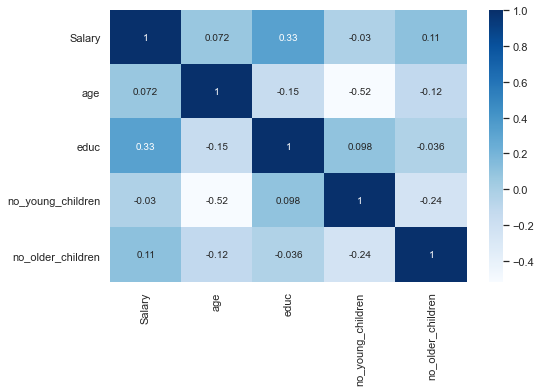

In [225]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Blues');
plt.show()

- There is no strong correlation between the variables,hence we do not face the issue of multicollinearity.
- Observing the heatmap we can see that the there is some positive correlation is among number of years of formal education and the salary received.
- The there some negative correlation between age and the employees with no of young children below age 7.

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Encoding the data
To convert the Object type data into integer

In [226]:
for feature in Holiday_df.columns: 
    if Holiday_df[feature].dtype == 'object':
        Holiday_df[feature] = pd.Categorical(Holiday_df[feature]).codes 

In [227]:
Holiday_df['Holliday_Package']= Holiday_df['Holliday_Package'].astype(int)
Holiday_df['foreign'] = Holiday_df['foreign'].astype(int)

In [228]:
Holiday_df.dtypes

Holliday_Package     int32
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign              int32
dtype: object

### Checking the head of Dataset after encoding the Categorical variables

In [229]:
Holiday_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


##  Logistic Regression Model

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation. 

#### Capture the target column into separate vectors for training set and test set

In [230]:
# Copy all the predictor variables into X dataframe
X = Holiday_df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = Holiday_df['Holliday_Package']

#### Splitting data into training and test set (70:30)

In [231]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify = Holiday_df['Holliday_Package'])

In [232]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)


In [233]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Fit the Logistic Regression model

In [234]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### Predicting on Training and Test dataset

In [235]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

#### Getting the Predicted Classes and Probs

In [236]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.472567,0.527433
1,0.566864,0.433136
2,0.481019,0.518981
3,0.536356,0.463644
4,0.565362,0.434638


### Model Evaluation for Train

In [237]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.5245901639344263

#### AUC and ROC for the training data

AUC: 0.576


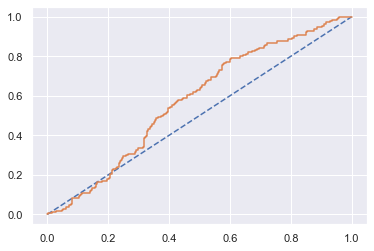

In [238]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Confusion Matrix for the training data

In [239]:
confusion_matrix(y_train, ytrain_predict)

array([[296,  33],
       [257,  24]], dtype=int64)

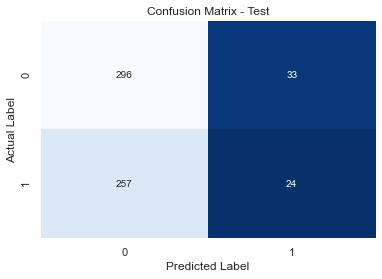

In [240]:
sns.heatmap(confusion_matrix(y_train,model.predict(X_train)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test')
plt.show()

#### Classification report for train data

In [241]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.54      0.90      0.67       329
           1       0.42      0.09      0.14       281

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.41       610
weighted avg       0.48      0.52      0.43       610



### Model Evaluation for Test

In [242]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.5305343511450382

#### AUC and ROC for the test data

AUC: 0.576


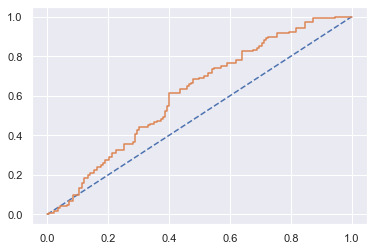

In [243]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

In [244]:
confusion_matrix(y_test, ytest_predict)

array([[127,  15],
       [108,  12]], dtype=int64)

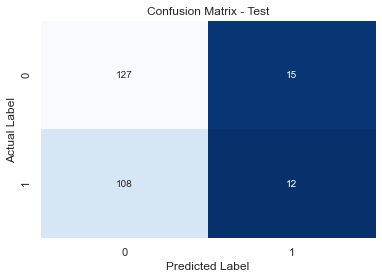

In [245]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test')
plt.show()

#### Classification Report for test data

In [246]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.54      0.89      0.67       142
           1       0.44      0.10      0.16       120

    accuracy                           0.53       262
   macro avg       0.49      0.50      0.42       262
weighted avg       0.50      0.53      0.44       262



### Applying GridSearchCV for Logistic Regression

In [247]:
grid={'penalty':['l2','none'],
      'solver':['liblinear','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001],
      'max_iter': [10000, 5000,15000]}

In [248]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [249]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'max_iter': [10000, 5000, 15000],
                         'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [250]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg')


In [251]:
best_model = grid_search.best_estimator_

In [252]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [253]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


### Model evaluation for Train data

In [290]:
best_model.score(X_train, y_train)

0.6672131147540984

#### Get the confusion matrix on the train data

In [254]:
confusion_matrix(y_train, best_model.predict(X_train))

array([[244,  85],
       [118, 163]], dtype=int64)

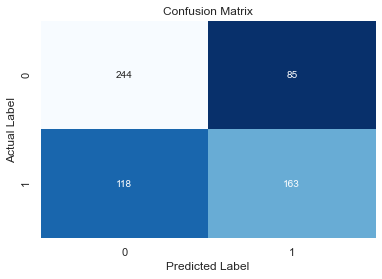

In [255]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,best_model.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model.predict(X_train)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [256]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



### Model evaluation for Test data

In [291]:
best_model.score(X_test, y_test)

0.6526717557251909

In [257]:
confusion_matrix(y_test, best_model.predict(X_test))

array([[109,  33],
       [ 58,  62]], dtype=int64)

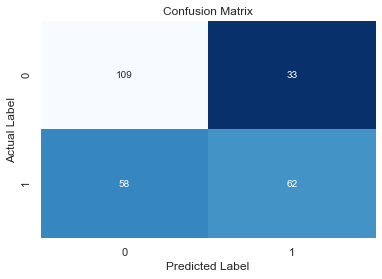

In [258]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,best_model.predict(X_test))
sns.heatmap(confusion_matrix(y_test,best_model.predict(X_test)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [259]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



AUC for the Training Data: 0.735
AUC for the Test Data: 0.717


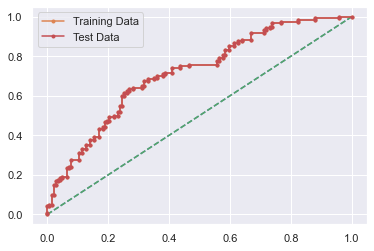

In [339]:
# AUC and ROC for the training data
probs = best_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
probs_t = best_model.predict_proba(X_test)
probs_t = probs_t[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs_t)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
lg_test_fpr, lg_test_tpr, thresholds = metrics.roc_curve(y_test,probs_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


## LDA Model

In [262]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [263]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Prediction

In [264]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

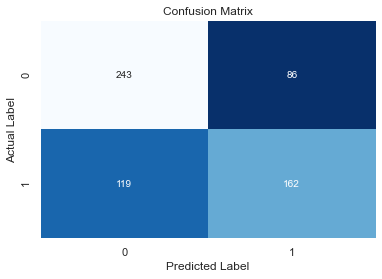

In [265]:
confusion_matrix(y_train,pred_class_train)
sns.heatmap(confusion_matrix(y_train,pred_class_train),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

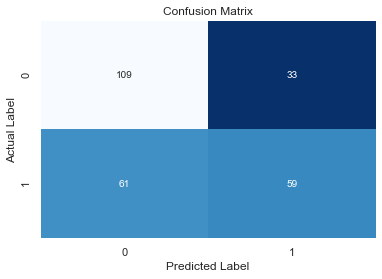

In [266]:
confusion_matrix(y_test,pred_class_test)
sns.heatmap(confusion_matrix(y_test,pred_class_test),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [267]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



### Probability prediction for the training and test data

In [268]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [269]:
pred_prob_train[:,1]

array([0.7381512 , 0.28961707, 0.38234291, 0.76483486, 0.46682945,
       0.44346246, 0.37680169, 0.30948321, 0.61081614, 0.64208316,
       0.25213217, 0.26469615, 0.39923017, 0.04631524, 0.23022974,
       0.36249565, 0.53701148, 0.33367574, 0.63047975, 0.62551868,
       0.62038047, 0.26045898, 0.8778445 , 0.33010529, 0.09907975,
       0.83197262, 0.20726445, 0.7448485 , 0.52475576, 0.18602064,
       0.34007289, 0.32707499, 0.37873484, 0.42874061, 0.31084381,
       0.28746402, 0.11553843, 0.53094637, 0.47040748, 0.22122639,
       0.26026817, 0.80975365, 0.51459465, 0.74029285, 0.79737631,
       0.40099878, 0.298335  , 0.93065406, 0.44451279, 0.70660174,
       0.75490574, 0.46875931, 0.77220783, 0.37565531, 0.22661608,
       0.74188557, 0.26237721, 0.5247693 , 0.6721239 , 0.34088095,
       0.62335813, 0.57741879, 0.54295979, 0.45085985, 0.56389786,
       0.5965561 , 0.12149134, 0.57410954, 0.3890238 , 0.26157228,
       0.35655665, 0.7429183 , 0.76617151, 0.22742495, 0.42898

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


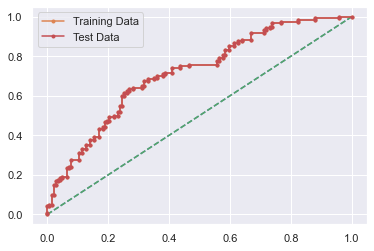

In [340]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

The model accuracy on the training as well as the test set is about 63% and 65% respectively, which is roughly the same proportion as the class 0 observations in the dataset. This model is affected by a class imbalance problem. Since we only have 872 observations, if re-build the same LDA model with more number of data points, an even better model could be built.


## change the cut-off values for maximum recall

0.1 

Recall Score 0.9964
F1 Score 0.6393 

Confusion Matrix


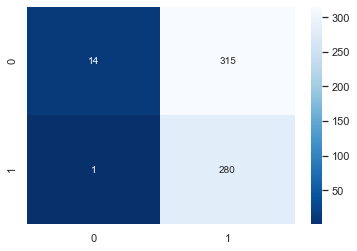

0.2 

Recall Score 0.9644
F1 Score 0.6499 

Confusion Matrix


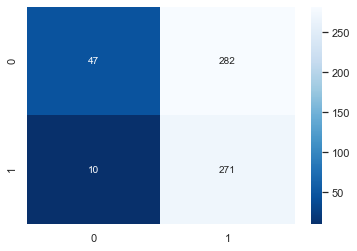

0.3 

Recall Score 0.8932
F1 Score 0.6693 

Confusion Matrix


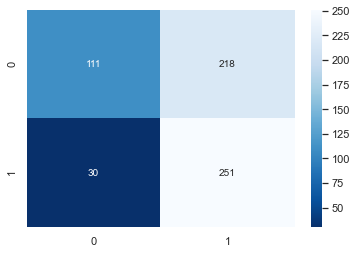

0.4 

Recall Score 0.758
F1 Score 0.6762 

Confusion Matrix


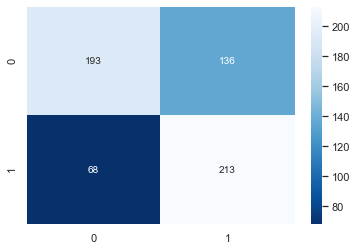

0.5 

Recall Score 0.5765
F1 Score 0.6125 

Confusion Matrix


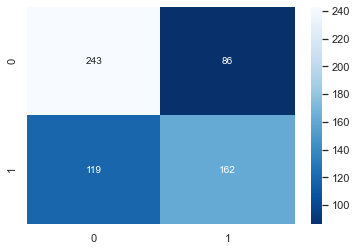

0.6 

Recall Score 0.4235
F1 Score 0.5336 

Confusion Matrix


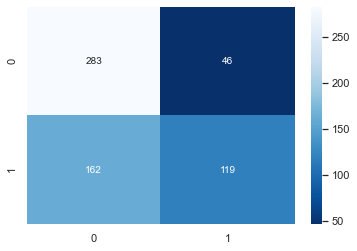

0.7 

Recall Score 0.2989
F1 Score 0.4398 

Confusion Matrix


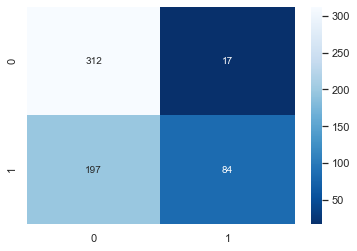

0.8 

Recall Score 0.1103
F1 Score 0.1981 

Confusion Matrix


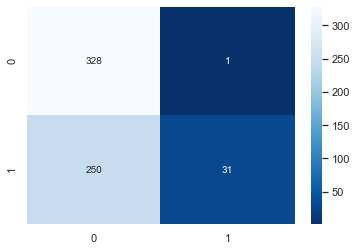

0.9 

Recall Score 0.0071
F1 Score 0.0141 

Confusion Matrix


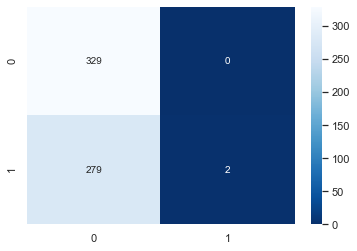

In [271]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g',cmap='Blues_r'),'\n\n'
    plt.show();

In [316]:
#Predicting the classes on the train data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)
    

In [317]:
import numpy as np
my_list = data_pred_custom_cutoff
m_array = np.asarray(my_list)
m_array

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,

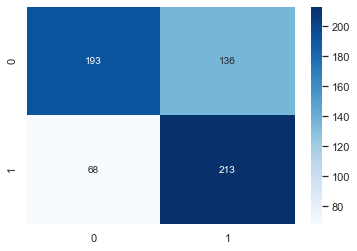

In [318]:
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Blues');

In [319]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off train data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.74      0.59      0.65       329
           1       0.61      0.76      0.68       281

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.68      0.67      0.66       610
 



In [335]:
ldamodel_train_score = round(metrics.accuracy_score(y_train,data_pred_custom_cutoff),4)
ldamodel_train_score

0.6656

In [336]:
ldamodel_test_score = round(metrics.accuracy_score(y_test,data_pred_custom_cutoff_t),4)
ldamodel_test_score

0.645

In [313]:
#Predicting the classes on the test data

data_pred_custom_cutoff_t=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_t.append(a)

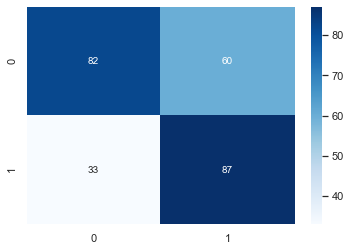

In [314]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff_t)),annot=True,fmt='.5g',cmap='Blues');

In [315]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff_t),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



### comparison of performance metrics between models

In [282]:
cmetrics=classification_report(y_train,best_model.predict(X_train),output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(df.loc["1"][2],2)
lg_train_recall=round(df.loc["1"][1],2)
lg_train_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.674033,0.741641,0.706223,329.000000
1,0.657258,0.580071,0.616257,281.000000
accuracy,0.667213,0.667213,0.667213,0.667213
macro avg,0.665646,0.660856,0.661240,610.000000
weighted avg,0.666306,0.667213,0.664780,610.000000


In [284]:
cmetrics=classification_report(y_test,best_model.predict(X_test),output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_test_f1=round(df.loc["1"][2],2)
lg_test_recall=round(df.loc["1"][1],2)
lg_test_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.652695,0.767606,0.705502,142.000000
1,0.652632,0.516667,0.576744,120.000000
accuracy,0.652672,0.652672,0.652672,0.652672
macro avg,0.652663,0.642136,0.641123,262.000000
weighted avg,0.652666,0.652672,0.646529,262.000000


In [320]:
cmetrics=metrics.classification_report(y_train,data_pred_custom_cutoff, output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.739464,0.586626,0.654237,329.000000
1,0.610315,0.758007,0.676190,281.000000
accuracy,0.665574,0.665574,0.665574,0.665574
macro avg,0.674889,0.672317,0.665214,610.000000
weighted avg,0.679971,0.665574,0.664350,610.000000


In [321]:
cmetrics=classification_report(y_test,data_pred_custom_cutoff_t,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.713043,0.577465,0.638132,142.000000
1,0.591837,0.725000,0.651685,120.000000
accuracy,0.645038,0.645038,0.645038,0.645038
macro avg,0.652440,0.651232,0.644909,262.000000
weighted avg,0.657529,0.645038,0.644340,262.000000


In [338]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic reg Train':[best_model.score(X_train, y_train),metrics.roc_auc_score(y_train,probs),lg_train_recall,lg_train_precision,lg_train_f1],
        'Logistic reg Test':[best_model.score(X_test, y_test),metrics.roc_auc_score(y_test,probs_t),lg_test_recall,lg_test_precision,lg_test_f1],
        'LDA Train':[ldamodel_train_score,metrics.roc_auc_score(y_train,pred_prob_train[:,1]),lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[ldamodel_test_score,metrics.roc_auc_score(y_test,pred_prob_test[:,1]),lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.67,0.64
AUC,0.74,0.72,0.73,0.71
Recall,0.58,0.52,0.76,0.72
Precision,0.66,0.65,0.61,0.59
F1 Score,0.62,0.58,0.68,0.65


ROC curve for Train data 


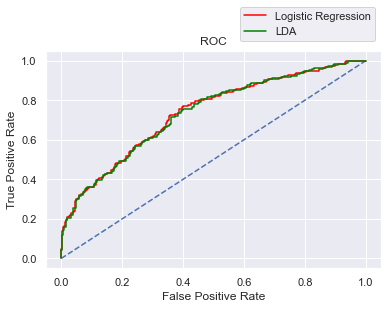

In [341]:
print("ROC curve for Train data ")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_train_fpr, lg_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for Test data


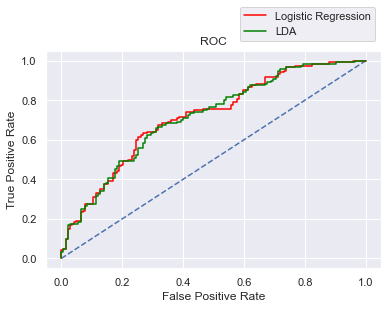

In [342]:
print("ROC curve for Test data")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_test_fpr, lg_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Thank you